**Các thành viên nhóm 13:**
- Lưu Trường Dương 19120489
- Huỳnh Quốc Duy 19120494
- Bùi Trường Giang 19120497
- Phạm Đức Huy 19120534
- Lê Thành Lộc 19120562

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('data/VN_housing_dataset.csv',skiprows=-1).iloc[:-1,1:]
df.head()

Ngày                                            Địa chỉ  \
0  8/5/2020  Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...   
1  8/5/2020  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   
2  8/5/2020  phố minh khai, Phường Minh Khai, Quận Hai Bà T...   
3  8/5/2020  Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...   
4  8/5/2020  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   

                Quận             Huyện        Loại hình nhà ở Giấy tờ pháp lý  \
0      Quận Cầu Giấy   Phường Nghĩa Đô           Nhà ngõ, hẻm        Đã có sổ   
1    Quận Thanh Xuân  Phường Kim Giang  Nhà mặt phố, mặt tiền             NaN   
2  Quận Hai Bà Trưng  Phường Minh Khai           Nhà ngõ, hẻm        Đã có sổ   
3        Quận Tây Hồ  Phường Thụy Khuê           Nhà ngõ, hẻm        Đã có sổ   
4    Quận Thanh Xuân  Phường Kim Giang           Nhà ngõ, hẻm             NaN   

  Số tầng Số phòng ngủ Diện tích      Dài Rộng           Giá/m2  
0       4      5 phòng     46 m²      NaN  NaN   86,96 triệu/m²  
1     NaN      3 phòng     37 m²      NaN  NaN  116,22 triệu/m²  
2       4      4 phòng     40 m²     10 m  4 m      65 triệu/m²  
3     NaN      6 phòng     51 m²  12.75 m  4 m     100 triệu/m²  
4     NaN      4 phòng     36 m²      9 m  4 m   86,11 triệu/m²

# Mô tả, khám phá dữ liệu - Giang

## Dữ liệu có bao nhiêu dòng và cột ?

In [3]:
n_rows, n_col = df.shape
n_rows, n_col

(82495, 12)

Như vậy ta có được dữ liệu hiện tại đưa vào là 82496 dòng và 12 cột.

In [4]:
df.Ngày.unique()

array(['8/5/2020', '8/4/2020', '8/3/2020', '8/2/2020', '8/1/2020',
       '7/31/2020', '7/30/2020', '7/29/2020', '7/28/2020', '7/27/2020',
       '7/26/2020', '7/25/2020', '7/24/2020', '7/23/2020', '7/22/2020',
       '7/21/2020', '7/20/2020', '7/19/2020', '7/18/2020', '7/17/2020',
       '7/16/2020', '7/15/2020', '7/14/2020', '7/13/2020', '7/12/2020',
       '7/11/2020', '7/10/2020', '7/9/2020', '7/8/2020', '7/7/2020',
       '7/6/2020', '7/5/2020', '7/4/2020', '7/3/2020', '7/2/2020',
       '7/1/2020', '6/30/2020', '6/29/2020', '6/28/2020', '6/27/2020',
       '6/26/2020', '6/25/2020', '6/24/2020', '6/23/2020', '6/22/2020',
       '6/21/2020', '6/20/2020', '6/19/2020', '6/18/2020', '6/17/2020',
       '6/16/2020', '6/15/2020', '6/14/2020', '6/13/2020', '6/12/2020',
       '6/11/2020', '6/10/2020', '6/9/2020', '6/8/2020', '6/7/2020',
       '6/6/2020', '6/5/2020', '6/4/2020', '6/3/2020', '6/2/2020',
       '6/1/2020', '5/31/2020', '5/30/2020', '5/29/2020', '5/28/2020',
       '5/27/20

In [5]:
len(df.Ngày.unique())

174

- Dữ liệu được public trên kaggle ở đường dẫn [sau](https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi?fbclid=IwAR0RbWPf-NLdwLbKpgH7AK41Fgr32CXXIYXczr8jteKNsqdkx-sqUmCAyHM) với license là [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)
- Dữ liệu được lấy từ ngày 5/8/2019 đến ngày 5/8/2020 tức là đúng 1 năm tuy nhiên chỉ có 174 ngày. Mỗi dòng tương ứng với thông tin về một căn nhà ở Hà Nội cũng như giá của căn nhà đó.
- Có tổng cộng 12 cột: **'Ngày', 'Địa chỉ', 'Quận', 'Huyện', 'Loại hình nhà ở', 'Giấy tờ pháp lý', 'Số tầng', 'Số phòng ngủ', 'Diện tích', 'Dài', 'Rộng', 'Giá/m2'**

## Dữ liệu các dòng có bị lặp hay không?

In [6]:
df[df.duplicated(keep=False)]

Ngày                                            Địa chỉ  \
168    8/4/2020  Đường Đông Thiên, Phường Vĩnh Hưng, Quận Hoàng...   
418    8/4/2020  Đường Giải Phóng, Phường Giáp Bát, Quận Hoàng ...   
795    8/4/2020  Đường Bạch Mai, Phường Bạch Mai, Quận Hai Bà T...   
866    8/4/2020  Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đình, H...   
946    8/4/2020  Đường Nhân Hòa, Phường Nhân Chính, Quận Thanh ...   
...         ...                                                ...   
81446  6/6/2020  Đường Giáp Bát, Phường Giáp Bát, Quận Hoàng Ma...   
81604  6/6/2020  Đường Phạm Ngọc Thạch, Phường Kim Liên, Quận Đ...   
81624  6/6/2020  Đường Phạm Ngọc Thạch, Phường Kim Liên, Quận Đ...   
81884  6/6/2020  Đường Yên Lãng, Phường Thịnh Quang, Quận Đống...   
81928  6/6/2020  Đường Yên Lãng, Phường Thịnh Quang, Quận Đống...   

                    Quận               Huyện Loại hình nhà ở Giấy tờ pháp lý  \
168       Quận Hoàng Mai    Phường Vĩnh Hưng    Nhà ngõ, hẻm        Đã có sổ   
418       Quận Hoàng Mai     Phường Giáp Bát    Nhà ngõ, hẻm        Đã có sổ   
795    Quận Hai Bà Trưng     Phường Bạch Mai    Nhà ngõ, hẻm             NaN   
866         Quận Ba Đình      Phường Đội Cấn    Nhà ngõ, hẻm             NaN   
946      Quận Thanh Xuân   Phường Nhân Chính    Nhà ngõ, hẻm             NaN   
...                  ...                 ...             ...             ...   
81446     Quận Hoàng Mai     Phường Giáp Bát    Nhà ngõ, hẻm        Đã có sổ   
81604       Quận Đống Đa     Phường Kim Liên    Nhà ngõ, hẻm        Đã có sổ   
81624       Quận Đống Đa     Phường Kim Liên    Nhà ngõ, hẻm        Đã có sổ   
81884       Quận Đống Đa  Phường Thịnh Quang    Nhà ngõ, hẻm        Đã có sổ   
81928       Quận Đống Đa  Phường Thịnh Quang    Nhà ngõ, hẻm        Đã có sổ   

      Số tầng Số phòng ngủ Diện tích  Dài Rộng           Giá/m2  
168       NaN      3 phòng     30 m²  NaN  NaN      70 triệu/m²  
418       NaN      4 phòng     60 m²  NaN  NaN   58,33 triệu/m²  
795       NaN      4 phòng     45 m²  NaN  NaN   88,89 triệu/m²  
866       NaN      4 phòng     60 m²  NaN  NaN   76,67 triệu/m²  
946       NaN      3 phòng     42 m²  NaN  NaN  114,29 triệu/m²  
...       ...          ...       ...  ...  ...              ...  
81446       5      3 phòng     48 m²  NaN  NaN   72,92 triệu/m²  
81604     NaN      2 phòng     40 m²  NaN  NaN      60 triệu/m²  
81624     NaN      2 phòng     40 m²  NaN  NaN      60 triệu/m²  
81884       3      2 phòng     32 m²  NaN  5 m   98,44 triệu/m²  
81928       3      2 phòng     32 m²  NaN  5 m   98,44 triệu/m²  

[1504 rows x 12 columns]

In [7]:
df.drop_duplicates(keep = 'first',inplace=True)

In [8]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [Ngày, Địa chỉ, Quận, Huyện, Loại hình nhà ở, Giấy tờ pháp lý, Số tầng, Số phòng ngủ, Diện tích, Dài, Rộng, Giá/m2]
Index: []

## Dữ liệu các dòng có bị thiếu hay không?

In [9]:
df.isna().sum()

Ngày                   0
Địa chỉ               47
Quận                   1
Huyện                 47
Loại hình nhà ở       31
Giấy tờ pháp lý    28420
Số tầng            45461
Số phòng ngủ          38
Diện tích              1
Dài                61932
Rộng               46383
Giá/m2                12
dtype: int64

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [10]:
df.dtypes

Ngày               object
Địa chỉ            object
Quận               object
Huyện              object
Loại hình nhà ở    object
Giấy tờ pháp lý    object
Số tầng            object
Số phòng ngủ       object
Diện tích          object
Dài                object
Rộng               object
Giá/m2             object
dtype: object

- Đưa cột Ngày về dạng datetime

In [11]:
df.Ngày = pd.to_datetime(df.Ngày)

In [12]:
df.head(3)

Ngày                                            Địa chỉ  \
0 2020-08-05  Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...   
1 2020-08-05  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   
2 2020-08-05  phố minh khai, Phường Minh Khai, Quận Hai Bà T...   

                Quận             Huyện        Loại hình nhà ở Giấy tờ pháp lý  \
0      Quận Cầu Giấy   Phường Nghĩa Đô           Nhà ngõ, hẻm        Đã có sổ   
1    Quận Thanh Xuân  Phường Kim Giang  Nhà mặt phố, mặt tiền             NaN   
2  Quận Hai Bà Trưng  Phường Minh Khai           Nhà ngõ, hẻm        Đã có sổ   

  Số tầng Số phòng ngủ Diện tích   Dài Rộng           Giá/m2  
0       4      5 phòng     46 m²   NaN  NaN   86,96 triệu/m²  
1     NaN      3 phòng     37 m²   NaN  NaN  116,22 triệu/m²  
2       4      4 phòng     40 m²  10 m  4 m      65 triệu/m²

- Tiền xử lý các cột số phòng ngủ, diện tích, dài, rộng. Tạo cột giá dựa trên cột Giá/m2

In [13]:
# column Số tầng, Số phòng ngủ
# đối với số tầng nếu giá trị là nhiều hơn 10 ta mặc định là 11
df['Số tầng'][df['Số tầng'] == 'Nhiều hơn 10'] = 11
df['Số tầng'] = pd.to_numeric(df['Số tầng'])

df['Số phòng ngủ'][df['Số phòng ngủ'] == 'nhiều hơn 10 phòng'] = '11 phòng'
df['Số phòng ngủ'] = df['Số phòng ngủ'].str.split()
df['Số phòng ngủ'] = df['Số phòng ngủ'].str[0]
df['Số phòng ngủ'] = pd.to_numeric(df['Số phòng ngủ'])
# column Diện tích, Dài, Rộng, Giá
df['Diện tích'] = df['Diện tích'].str.split().str[0]
df['Dài'] = df['Dài'].str.split().str[0]
df['Rộng'] = df['Rộng'].str.split().str[0]

df['Diện tích'] = pd.to_numeric(df['Diện tích'])
df['Dài'] = pd.to_numeric(df['Dài'])
df['Rộng'] = pd.to_numeric(df['Rộng'])

C:\Users\letha\AppData\Local\Temp/ipykernel_3336/1215727284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Số tầng'][df['Số tầng'] == 'Nhiều hơn 10'] = 11
C:\Users\letha\AppData\Local\Temp/ipykernel_3336/1215727284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Số phòng ngủ'][df['Số phòng ngủ'] == 'nhiều hơn 10 phòng'] = '11 phòng'


In [14]:
def transform(x):
    #print(x)
    if 'triệu/m²' in str(x):
        if ',' in str(x):
            number0 = len(x.split(',')[1].split(' ')[0])
            x = str(x).replace(',','').replace(' triệu/m²',(6-number0)*'0')
        else:
            x = str(x).replace(' triệu/m²',6*'0')
    if 'tỷ/m²' in str(x):
        if ',' in str(x):
            number0 = len(x.split(',')[1].split(' ')[0])
            x = str(x).replace(',','').replace(' tỷ/m²',(9-number0)*'0')
        else:
            x = str(x).replace(' tỷ/m²',9*'0')
    x = str(x).replace(' đ/m²','')
    return float(x)

df['Giá'] = df['Giá/m2'].apply(transform)

## Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào

Vì trong các cột có kiểu dữ liệu dạng số, có vài cột có ít hơn 25 giá trị khác nhau nên ta sẽ xét chúng vào nhóm kiểu dữ liệu dạng phân loại

In [15]:
unique_counts = df.nunique() < 25
categorical  = unique_counts[unique_counts == True].index.tolist()
categorical.extend(df.select_dtypes(exclude=["number","bool_",]).columns.tolist())
categorical = set(categorical)
categorical

{'Giá/m2',
 'Giấy tờ pháp lý',
 'Huyện',
 'Loại hình nhà ở',
 'Ngày',
 'Quận',
 'Số phòng ngủ',
 'Địa chỉ'}

Do đó các cột có kiểu dữ liệu dạng số sẽ là các cột còn lại:

In [16]:
numeric = [x for x in df.columns.tolist() if x not in categorical]
numeric

['Số tầng', 'Diện tích', 'Dài', 'Rộng', 'Giá']

Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:

- Số các giá trị thiếu
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Giá trị min
- Giá trị median
- Giá trị max

In [17]:
def calculate_quartile(data):
    nume_col_info_df = pd.DataFrame()
    for col in data.keys():
        missing = data[col].isnull().sum()
        missing_percentage = round(data[col].isnull().sum() * 100 / len(data[col]), 1)
        mean_value = data[col].mean()
        min_value = data[col].min()
        lower_quartile = data[col].quantile(0.25)
        median = data[col].median()
        upper = data[col].quantile(0.75)
        max_value = data[col].max()
        row_line = pd.Series([missing,missing_percentage,mean_value, min_value, lower_quartile, median, upper, max_value], 
                            index = ['num_missing','missing_percentage', 'mean','min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
        nume_col_info_df[col] = row_line
    return nume_col_info_df
calculate_quartile(df[numeric])

Số tầng      Diện tích            Dài           Rộng  \
num_missing         45461.000000       1.000000   61932.000000   46383.000000   
missing_percentage     55.700000       0.000000      75.800000      56.800000   
mean                    4.463072      51.467003      90.080395      37.955145   
min                     1.000000       1.000000       1.000000       1.000000   
lower_quartile          4.000000      34.000000       8.000000       4.000000   
median                  5.000000      40.000000      10.000000       4.000000   
upper_quartile          5.000000      50.000000      12.000000       5.000000   
max                    73.000000  111411.000000  900000.000000  423432.000000   

                             Giá  
num_missing         1.200000e+01  
missing_percentage  0.000000e+00  
mean                1.116489e+08  
min                 1.000000e+00  
lower_quartile      7.273000e+07  
median              8.960000e+07  
upper_quartile      1.105300e+08  
max                 1.240000e+11

## Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu không phải số và các cột có dạng số nhưng có ít hơn 25 giá trị khác nhau, ta sẽ tính:

- Số các giá trị thiếu và tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu)
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

In [18]:
missing = [];missing_percentage=[];num_values=[];value_percentages=[]

for column in categorical:
    missing.append(df[column].isnull().sum())
    missing_percentage.append((df[column].isnull().sum() * 100 / len(df)).round(1))
    temp = df[column].dropna()
    num_values.append(len(temp.unique()))
    value_percentages.append(((temp.value_counts(normalize=True)*100).round(1)).to_dict())
cat_info_df = pd.DataFrame([missing,missing_percentage,num_values,value_percentages],
                            index=['num_missing','missing_percentage','num_values','value_percentages'],
                            columns=list(categorical))
cat_info_df

Ngày  \
num_missing                                                         0   
missing_percentage                                                0.0   
num_values                                                        174   
value_percentages   {2020-08-04 00:00:00: 3.2, 2020-08-03 00:00:00...   

                                                      Loại hình nhà ở  \
num_missing                                                        31   
missing_percentage                                                0.0   
num_values                                                          4   
value_percentages   {'Nhà ngõ, hẻm': 75.7, 'Nhà mặt phố, mặt tiền'...   

                                                              Địa chỉ  \
num_missing                                                        47   
missing_percentage                                                0.1   
num_values                                                      13957   
value_percentages   {'Đường Minh Khai, Phường Minh Khai, Quận Hai ...   

                                                      Giấy tờ pháp lý  \
num_missing                                                     28420   
missing_percentage                                               34.8   
num_values                                                          3   
value_percentages   {'Đã có sổ': 98.7, 'Đang chờ sổ': 0.7, 'Giấy t...   

                                                                 Quận  \
num_missing                                                         1   
missing_percentage                                                0.0   
num_values                                                         29   
value_percentages   {'Quận Đống Đa': 16.9, 'Quận Thanh Xuân': 15.6...   

                                                               Giá/m2  \
num_missing                                                        12   
missing_percentage                                                0.0   
num_values                                                       8345   
value_percentages   {'100 triệu/m²': 3.0, '80 triệu/m²': 1.4, '75 ...   

                                                                Huyện  \
num_missing                                                        47   
missing_percentage                                                0.1   
num_values                                                        309   
value_percentages   {'Phường Khương Trung': 3.4, 'Phường Khương Đì...   

                                                         Số phòng ngủ  
num_missing                                                        38  
missing_percentage                                                0.0  
num_values                                                         11  
value_percentages   {4.0: 35.3, 3.0: 32.9, 5.0: 9.6, 2.0: 8.9, 6.0...

## Sơ lược mối tương quan giữa các cột

Có vẻ như dữ liệu không có gì bất thường tuy nhiên ta sẽ tìm hiểu thêm về mối tương quan giữa các biến và kiểm tra xem có dữ liệu nào là outlier hay noise hay không.

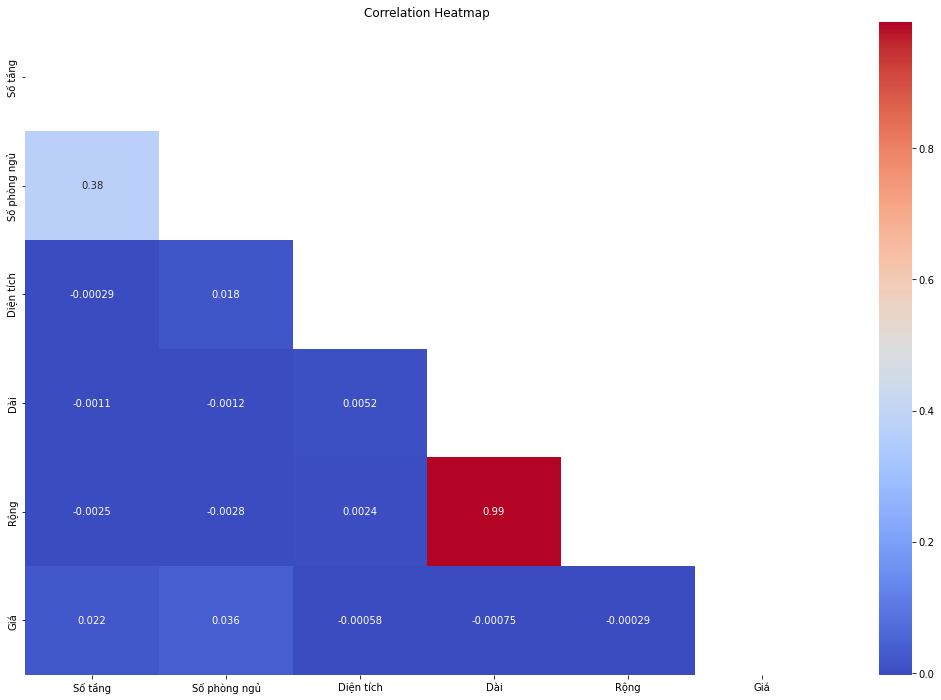

In [19]:
df_corr = df.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(18,12))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap");

# Phân tích Huy - Dương

## Phân tích các cột

### Xem xét phân bố nhà ở các quận

In [20]:
x = df['Quận'].value_counts().keys()
fig = go.Figure([go.Bar(x=x[:10], y=df['Quận'].value_counts()[:10])])
fig.update_layout(title_text='Số lượng nhà ở các quận',xaxis_title="Quận",
    yaxis_title="Số nhà")
fig.show()


=> Có xu hướng tăng dần ở trung tâm thành phố

### Phân bố của loại hình nhà ở

In [21]:
x = df['Loại hình nhà ở'].value_counts().keys()
fig = go.Figure([go.Bar(x=x, y=df['Loại hình nhà ở'].value_counts())])
fig.update_layout(title_text='Loại hình nhà ở',xaxis_title="Loại nhà",
    yaxis_title="Số nhà")
fig.show()


=> Ở trung tâm thì không có nhiều đất dẫn đến nhà ở ngõ hẻm nhiều vượt trội hơn so với các loại hình khác

### Giấy tờ pháp lý như thế nào?

Ta mặc định giá trị NaN ở đây là không rõ

In [22]:
df['Giấy tờ pháp lý'][df['Giấy tờ pháp lý'].isna()] = 'Không rõ'

C:\Users\letha\AppData\Local\Temp/ipykernel_3336/3211635305.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
x = df['Giấy tờ pháp lý'].value_counts().keys()
fig = go.Figure([go.Bar(x=x, y=df['Giấy tờ pháp lý'].value_counts())])
fig.update_layout(title_text='Số nhà theo giấy tờ pháp lý',xaxis_title="Loại giấy tờ",
    yaxis_title="Số nhà")
fig.show()


=> Mặc dù hầu hết nhà cửa đều đã có sổ nhưng có rất nhiều nhà vẫn không rõ tình trạng sổ sách. Do đó việc giá nhà cũng phải cân nhắc

### Phân bố của số tầng, số phòng ngủ, diện tích

In [24]:
x = df['Số tầng'].value_counts().keys()
fig = go.Figure([go.Bar(x=x[:10], y=df['Số tầng'].value_counts()[:10])])
fig.update_layout(title_text='Số nhà theo số tầng',xaxis_title="Số tầng",
    yaxis_title="Số nhà")
fig.show()


=>  Chủ yếu là từ tầng 3 4 5

In [25]:
x = df['Số phòng ngủ'].value_counts().keys()
fig = go.Figure([go.Bar(x=x, y=df['Số phòng ngủ'].value_counts())])
fig.update_layout(title_text='Số nhà theo số phòng ngủ',xaxis_title="Số phòng ngủ",
    yaxis_title="Số nhà")
fig.show()


=> Số phòng ngủ thường là 3 4 phòng

In [26]:
x = df['Diện tích']
# plt.hist(x, edgecolor='black', color='red', bins=np.arange(0, 150+1));
fig = go.Figure(go.Histogram(x=x,   xbins=dict(
        start=0,
        end=151,
        size=1
    ),
        marker_color='#cc0000',
    opacity=0.75))
fig.update_layout(title_text='Số nhà theo diện tích < 150',
 xaxis_title_text='Diện tích', # xaxis label
    yaxis_title_text='Số lượng', # yaxis label
    )
# fig.update_traces(mode='markers', marker_line_width=1, marker_size=10)
fig.show()



=> Phân bố diện tích chủ yếu là khoảng vào tầm  từ 30 -> 60 m2

### Phân tích giá

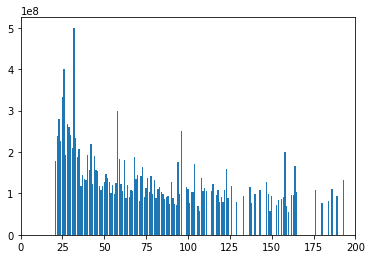

In [27]:
# x = df['Giá'].value_counts()[:10]
# 
# plt.hist(x, edgecolor='black', color='red', bins=np.arange(0, 200+1));

x = df['Giá'].value_counts()[:100]
x = x.sort_index()
plt.bar(x, x.keys());
plt.xlim([0, 200]);
# plt.hist(x, edgecolor='black', color='red', bins=np.arange(100000000, 15000000000+1));

=> phân bố chủ yếu rơi vào từ 15 triệu - 75 triệu trên 1 m2 (khá mắc)

## Phân tích nhiều cột

### Ở các quận có nhiều nhà. Liệu số nhà có phân bố đều ở các huyện hay không?

In [28]:
df['Quận'].value_counts()[:4]

Quận Đống Đa         13839
Quận Thanh Xuân      12769
Quận Hoàng Mai       11063
Quận Hai Bà Trưng    10381
Name: Quận, dtype: int64

Ta sẽ lấy 4 quận có nhiều nhà nhất để phân tích

<AxesSubplot:ylabel='Huyện'>

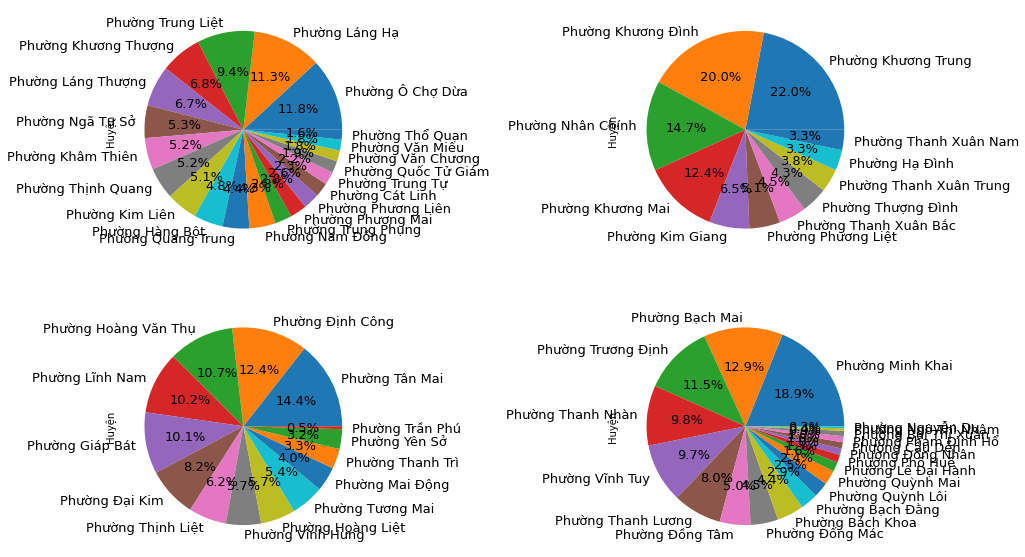

In [29]:
fig, axis = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

df['Huyện'][df['Quận'] == 'Quận Đống Đa'].value_counts().plot(kind='pie', ax=axis[0][0] , autopct='%1.1f%%', fontsize=13)
df['Huyện'][df['Quận'] == 'Quận Thanh Xuân'].value_counts().plot(kind='pie', ax=axis[0][1] , autopct='%1.1f%%', fontsize=13)
df['Huyện'][df['Quận'] == 'Quận Hoàng Mai'].value_counts().plot(kind='pie', ax=axis[1][0] , autopct='%1.1f%%', fontsize=13)
df['Huyện'][df['Quận'] == 'Quận Hai Bà Trưng'].value_counts().plot(kind='pie', ax=axis[1][1] , autopct='%1.1f%%', fontsize=13)

In [30]:


name_quan = df['Quận'][:4].values


n=0
df_temp = (df[df['Quận'] == name_quan[n]][['Huyện']].value_counts()).to_frame()
df_temp = df_temp.reset_index(level=0)
df_temp.columns = ['Huyện','Số lượng'] 

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
[{'type':'domain'}, {'type':'domain'}]],subplot_titles=('Quận Cầu Giấy', 'Quận Thanh Xuân', 'Quận Hai Bà Trưng',
       'Quận Tây Hồ'))
fig.add_trace(go.Pie(labels=df_temp['Huyện'], values=df_temp['Số lượng'], name=name_quan[n]),
              1, 1)


n=1
df_temp = (df[df['Quận'] == name_quan[n]][['Huyện']].value_counts()).to_frame()
df_temp = df_temp.reset_index(level=0)
df_temp.columns = ['Huyện','Số lượng'] 

fig.add_trace(go.Pie(labels=df_temp['Huyện'], values=df_temp['Số lượng'], name=name_quan[n]),
              1, 2)
# Use `hole` to create a donut-like pie chart

n=2
df_temp = (df[df['Quận'] == name_quan[n]][['Huyện']].value_counts()).to_frame()
df_temp = df_temp.reset_index(level=0)
df_temp.columns = ['Huyện','Số lượng'] 

fig.add_trace(go.Pie(labels=df_temp['Huyện'], values=df_temp['Số lượng'], name=name_quan[n]),
              2,1)

n=3
df_temp = (df[df['Quận'] == name_quan[n]][['Huyện']].value_counts()).to_frame()
df_temp = df_temp.reset_index(level=0)
df_temp.columns = ['Huyện','Số lượng'] 

fig.add_trace(go.Pie(labels=df_temp['Huyện'], values=df_temp['Số lượng'], name=name_quan[n]),
              2, 2)



fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text='Tỉ lệ nhà tại các phường của 4 quận',legend_title="Tên phường", width=1000,
    height=1000)
fig.show()


=> Thường tập trung nhiều ở các phường đông dân, phát triển mạnh

### Các nhà mà có giá cao thường là loại nhà gì?

In [31]:
# ta sẽ lấy top 100 nhà có giá cao
x = df['Giá'].sort_values(ascending=False)[:100]
x = df['Loại hình nhà ở'][x.index].value_counts()
# plt.barh(x.keys(), x);
fig = go.Figure([go.Bar(x=x.keys(), y=x)])

fig.update_layout(title_text='Giá nhà theo loại nhà',xaxis_title="Loại nhà",
    yaxis_title="Giá")
fig.show()


=> Thường là nhà mặt phố, mặt tiền

### Diện tích liên quan đến giá cả thế nào

In [32]:
y = df['Giá'].sort_values(ascending=False)[:100]
x = df['Diện tích'][y.index]
# plt.scatter(x, y);
# # df['Diện tích']
# plt.ylabel("Giá");
# plt.xlabel("Diện tích");
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='markers'))
fig.update_traces(mode='markers', marker_line_width=1, marker_size=10)

fig.update_layout(title_text='Giá nhà theo diện tích',xaxis_title="Diện tích",
    yaxis_title="Giá")
fig.show()


=> Có vẻ như không có liên quan lắm

### Hình dáng ngôi nhà có gì đặc biệt (dài > rộng hay rộng < dài) liệu nó có đồng đều?

In [33]:
y = df['Dài'][:500]
x = df['Rộng'][:500]

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers',
                    name='markers'))


fig.update_traces(mode='markers', marker_line_width=1, marker_size=10)

fig.update_layout(title_text='Hình dạng đất',xaxis_title="Rộng",
    yaxis_title="Dài")
fig.show()


=> Có vẻ như chiều Dài và Rộng khá tương đồng nhau 

### Giấy tờ pháp lý có liên quan đến giá không?

In [34]:
# ta sẽ lấy top 100 nhà có giá cao
x = df['Giá'].sort_values(ascending=False)[:100]
x = df['Giấy tờ pháp lý'][x.index].value_counts()
# plt.barh(x.keys(), x);
fig = go.Figure([go.Bar(x=x, y=x.keys(),orientation='h')])
fig.update_layout(title_text='Số lượng nhà ở giá cao theo giấy tờ pháp lý',xaxis_title="Số nhà",
    yaxis_title="Loại giấy tờ")
fig.show()


=> Các nhà giá cả cao thường là các nhà đã có sổ

### Các cột như số tầng, số phòng ngủ liên quan thế nào đến giá?

In [35]:
# ta sẽ lấy top 100 nhà có giá cao
x = df['Giá'].sort_values(ascending=False)[:100]
x = df['Số tầng'][x.index].value_counts()
# plt.barh(x.keys(), x);
fig = go.Figure([go.Bar(x=x, y=x.keys(),orientation='h')])
fig.update_layout(title_text='Giá theo số tầng ')
fig.update_layout(title_text='Giá nhà cao theo số tầng',xaxis_title="Số nhà",
    yaxis_title="Số tầng")
fig.show()


=> nhà giá cao vẫn thường nằm ở số tầng từ 3 - 8

In [36]:
# ta sẽ lấy top 100 nhà có giá cao
x = df['Giá/m2'].sort_values(ascending=False)[:100]
x = df['Số phòng ngủ'][x.index].value_counts()
# plt.barh(x.keys(), x);
fig = go.Figure([go.Bar(x=x, y=x.keys(),orientation='h')])
fig.update_layout(title_text='Giá theo số phòng ngủ ')
fig.update_layout(title_text='Giá nhà cao theo số phòng ngủ',xaxis_title="Số nhà",
    yaxis_title="Số phòng ngủ")
fig.show()


=> Số phòng ngủ có chút khác nhưng vẫn nằm trong khoảng từ 3 - 6

## Phân tích thêm cột Giá

Lựa chọn các cột:  Quận, loại hình nhà ở, giấy tờ pháp lý, số tầng, số phòng ngủ, diện tích và giá

In [37]:
sub_df = df[['Quận', 'Loại hình nhà ở', 'Giấy tờ pháp lý', 'Số tầng', 'Số phòng ngủ', 'Diện tích', 'Giá']]
sub_df = sub_df.dropna()

Số hóa các cột Quận, loại hình, giấy tờ

In [38]:
sub_df['Quận'] = pd.factorize(sub_df['Quận'])[0]
sub_df['Loại hình nhà ở'] = pd.factorize(sub_df['Loại hình nhà ở'])[0]
sub_df['Giấy tờ pháp lý'] = pd.factorize(sub_df['Giấy tờ pháp lý'])[0]
sub_df

Quận  Loại hình nhà ở  Giấy tờ pháp lý  Số tầng  Số phòng ngủ  \
0         0                0                0      4.0           5.0   
2         1                0                0      4.0           4.0   
7         1                1                0      6.0           5.0   
9         2                0                0      4.0           3.0   
11        3                0                0      5.0           4.0   
...     ...              ...              ...      ...           ...   
82471     8                3                0      5.0           6.0   
82472    10                3                0      4.0           4.0   
82474     9                0                0      3.0           3.0   
82479     8                1                0      5.0           4.0   
82480    10                3                0      5.0           5.0   

       Diện tích          Giá  
0           46.0   86960000.0  
2           40.0   65000000.0  
7           32.0  184380000.0  
9           41.0   64630000.0  
11          30.0   83330000.0  
...          ...          ...  
82471       50.0  290000000.0  
82472       42.0   71430000.0  
82474       32.0  375000000.0  
82479       35.0   94290000.0  
82480       40.0   95000000.0  

[36215 rows x 7 columns]

### PCA model

In [39]:
from sklearn.decomposition import PCA

train_df = sub_df.drop('Giá', axis=1)

model = PCA(n_components=1)
model.fit(train_df)
info_2D =  model.transform(train_df)

train_df['PCA1'] = info_2D[:, 0] 
# train_df['PCA2'] = info_2D[:, 1]


# plt.scatter(train_df['PCA1'][:10000], sub_df['Giá'][:10000])
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df['PCA1'][:10000], y=sub_df['Giá'][:10000],
                    mode='markers',
                    name='markers'))
fig.update_traces(mode='markers', marker_line_width=1, marker_size=10)
fig.show()

=> Dữ liệu có mối quan hệ khá là tuyến tính ở đây. Một dấu hiệu tốt

In [40]:
x = pd.concat([train_df[['PCA1']], sub_df[['Giá']]], axis=1)
x['Giá'].value_counts(sort=False)

86960000.0      42
65000000.0     117
184380000.0      6
64630000.0      14
83330000.0     349
              ... 
381440000.0      1
257350000.0      1
176770000.0      1
165630000.0      1
304880000.0      1
Name: Giá, Length: 5683, dtype: int64

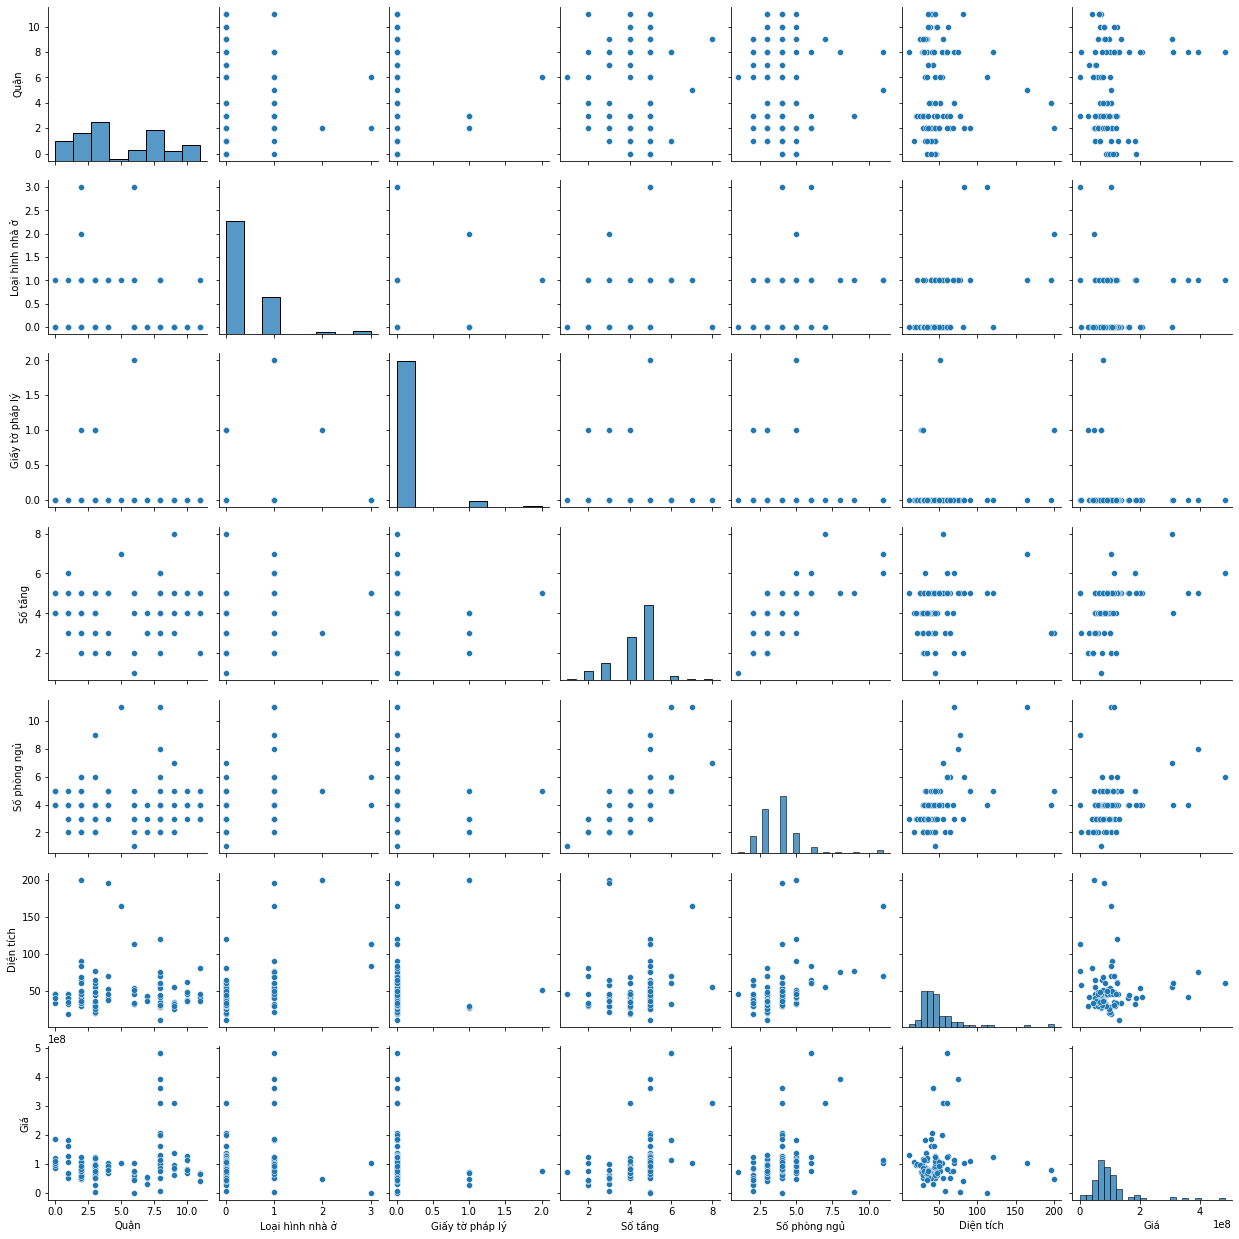

In [41]:
# new_df = pd.DataFrame()
# new_df['sum_col'] = df['TotalRecovered'] + df['TotalDeaths']
# new_df['TotalCases'] = df['TotalCases']
pair_df = sub_df
g = sns.pairplot(pair_df[:100], height=2.5)

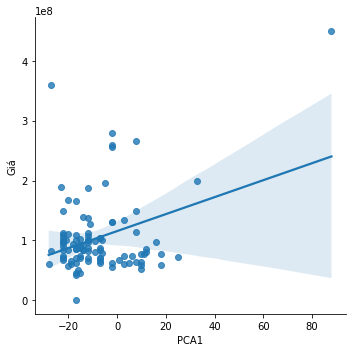

In [42]:
x = x.sample(100)
sns.lmplot(x="PCA1",y="Giá", data=x);

In [43]:
!pip install statsmodels

In [44]:
fig = px.scatter(x,x = 'PCA1',y= 'Giá', trendline='ols',trendline_color_override='red')
fig.show()

### Các nhân tố ảnh hưởng giá nhà

In [45]:
for i in df.columns[6:]:
    df[i] = df[i].fillna(0)
df_num = df[df.columns[6:]]
df_num = df_num[df_num['Giá'] <20000000 ]
fig = px.parallel_coordinates(df_num, color="Giá", color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()


Ta có cái nhìn tổng quát về các yếu tố ảnh hưởng đến giá đất. Tất cả các yếu tố là numeric như số tầng, diện tích, độ dài, độ rộng của đất không ảnh hưởng quá nhiều đến giá đất vì có thể thấy những đường đậm phân bố không đồng đều. Chỉ có diện tích, độ dài, rộng có vẻ như là có ảnh hưởng đến giá đất nhưng ở đây có lẽ chỉ là sự trùng hợp do đất ở khu vực trung tâm có diện tích nhỏ và giá đất cao nên mới thấy được chúng có vẻ như có liên quan đến nhau.

In [46]:
fig.data = []
lab = ['Chữ nhật','Khác']
val = [len(df[df['Diện tích'] == df['Dài'] * df['Rộng']]),len(df)]
trace = go.Pie(labels=lab, 
                values=val, 
                marker=dict(colors=['red']), 
                # Seting values to 
                hoverinfo="value"
              )
fig.update_layout(title_text='Tỉ lệ nhà quy hoạch đẹp',legend_title="Hình dạng đất", width=800,
    height=1000)
fig.add_trace(trace)
fig.show()


In [47]:
# df_temp = df[df['Diện tích'] == df['Dài'] * df['Rộng']]
df_temp = df.copy()
df_temp['Hình'] = np.where(df['Diện tích'] == df['Dài'] * df['Rộng'],1,0)
# df_temp.head(2)
df_temp = df_temp.groupby('Hình').mean()['Giá']
df_temp.head(2)

Hình
0    1.118377e+08
1    1.087078e+08
Name: Giá, dtype: float64

### Hồi quy

C:\Users\letha\Desktop\Data_Computer_Science\sample_project\env\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



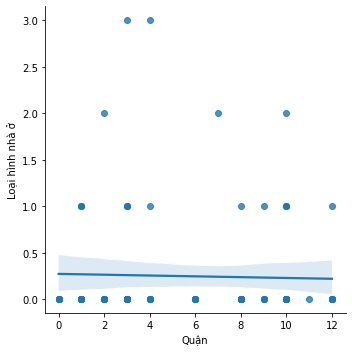

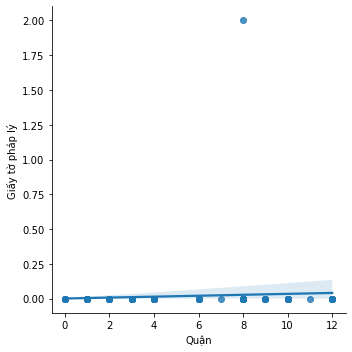

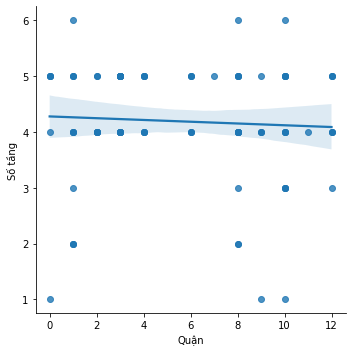

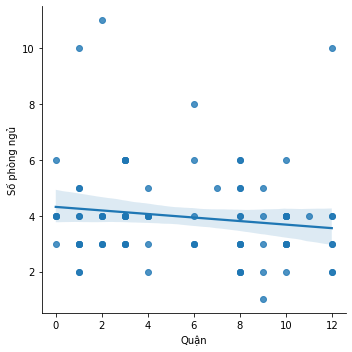

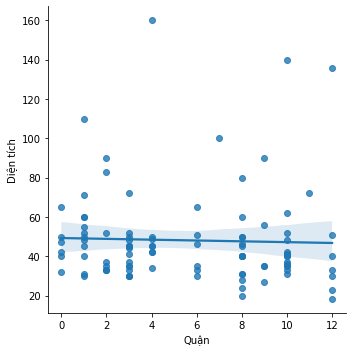

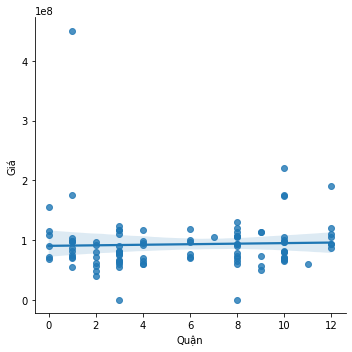

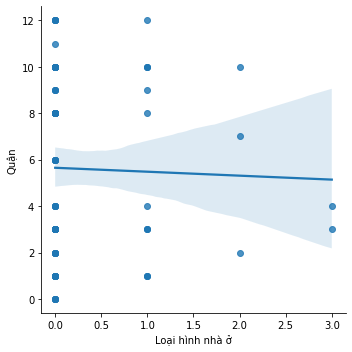

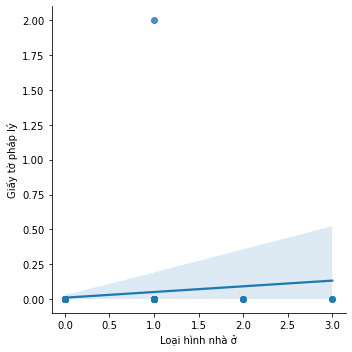

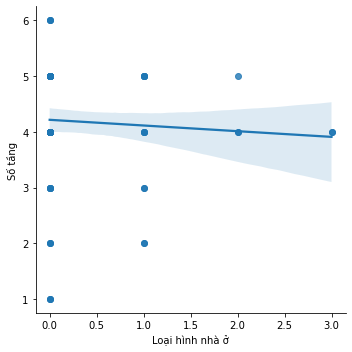

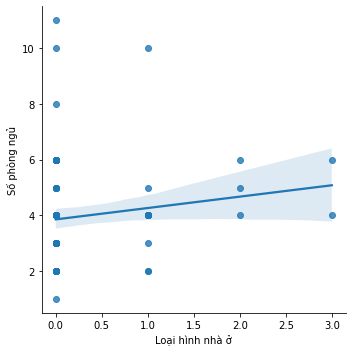

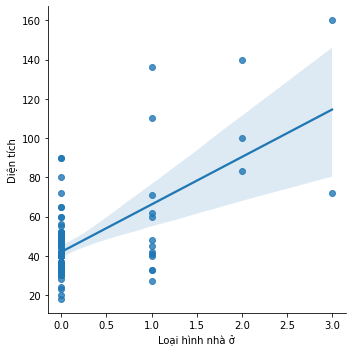

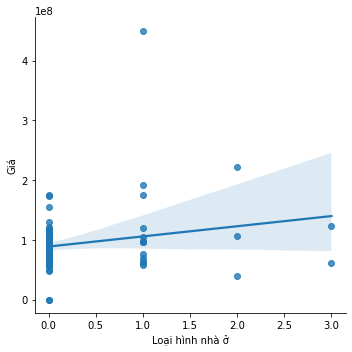

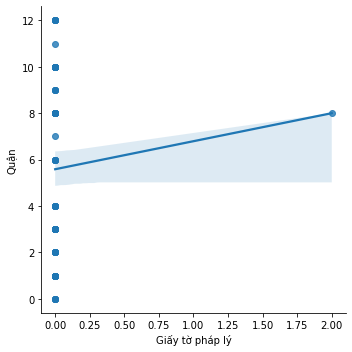

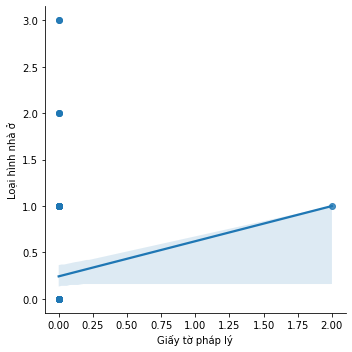

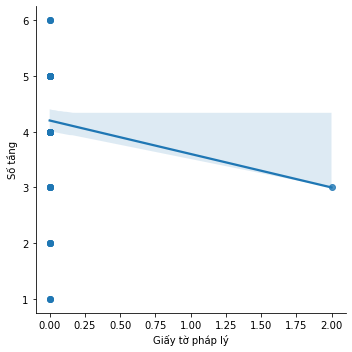

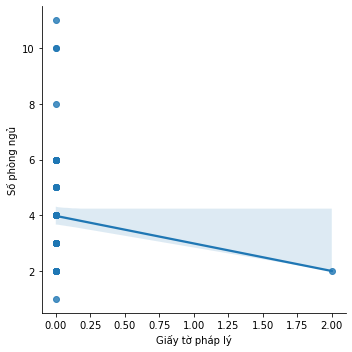

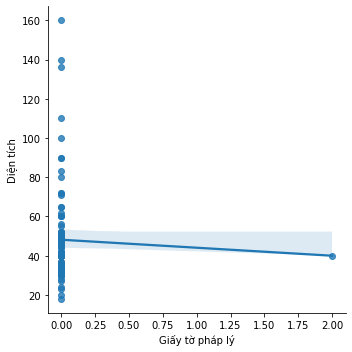

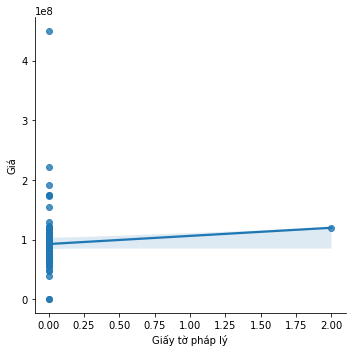

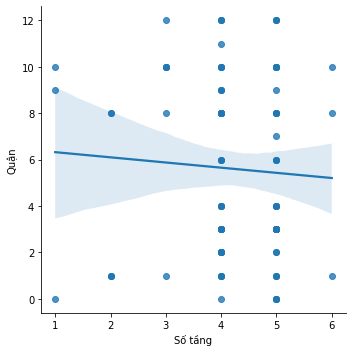

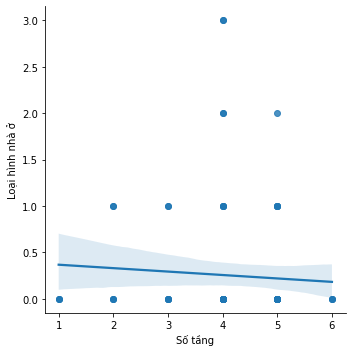

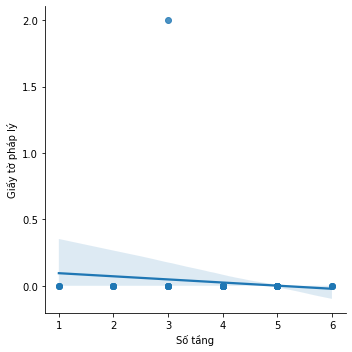

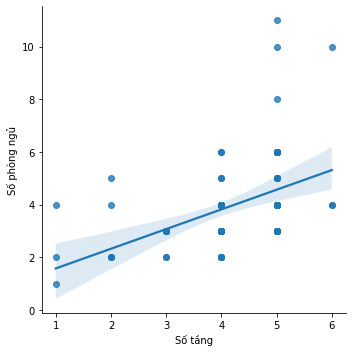

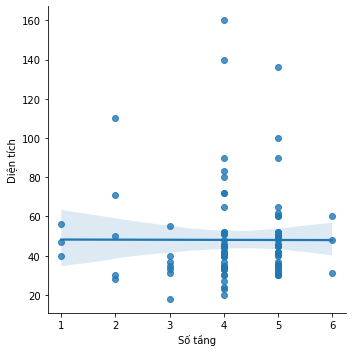

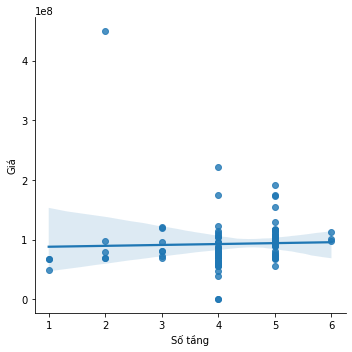

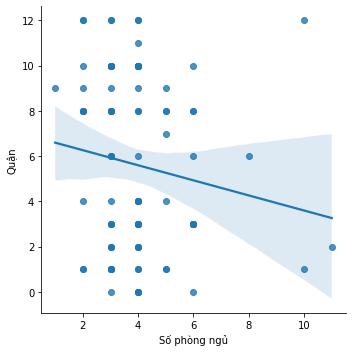

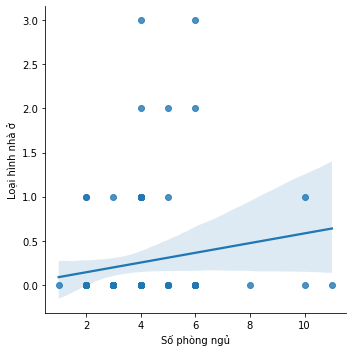

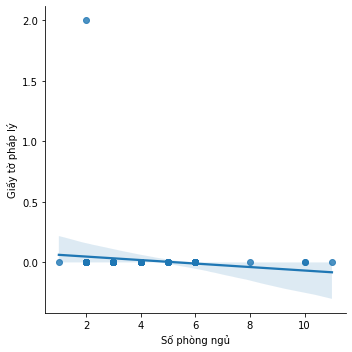

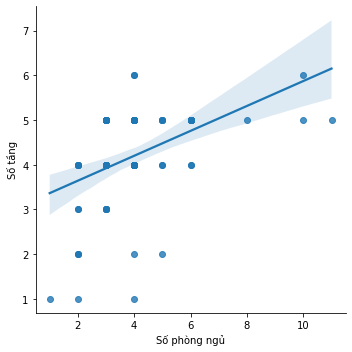

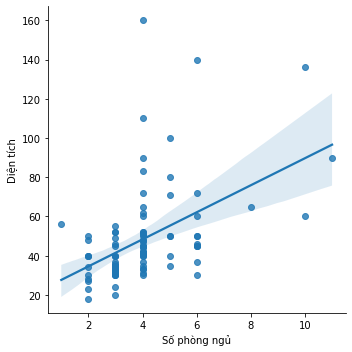

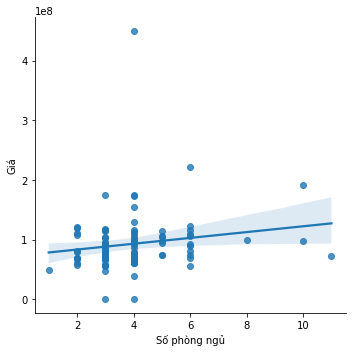

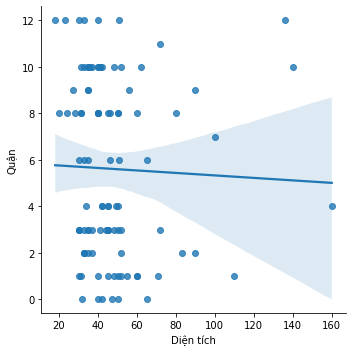

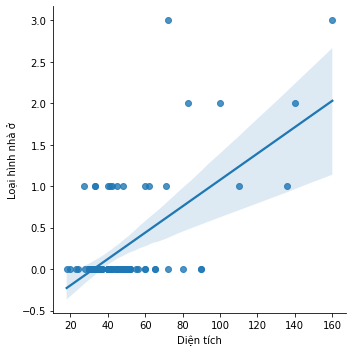

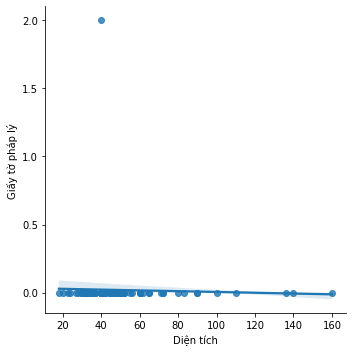

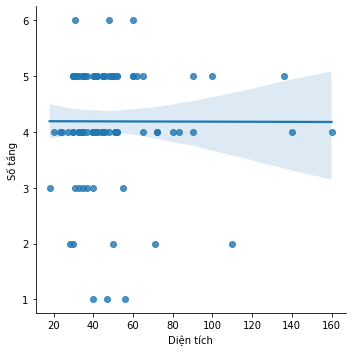

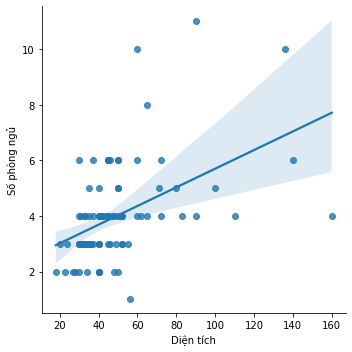

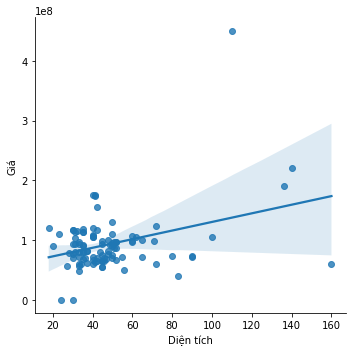

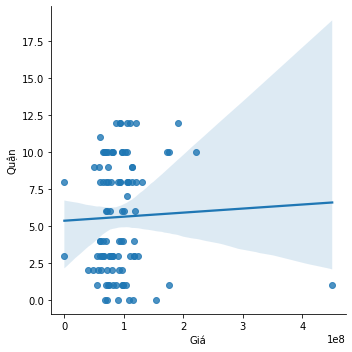

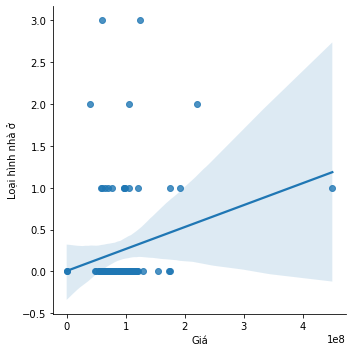

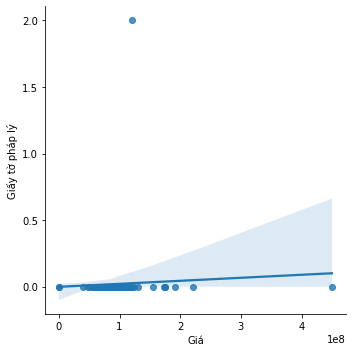

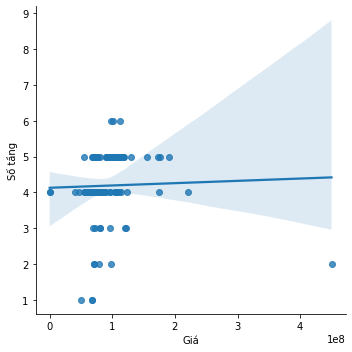

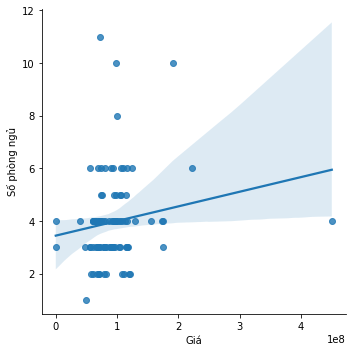

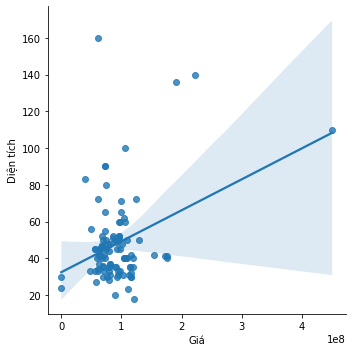

In [48]:
_x = sub_df.sample(100)
# sns.lmplot(x="PCA1",y="Giá", data=x);
for i in sub_df.keys():
    for j in sub_df.keys():
        if i != j: sns.lmplot(x=i, y=j, data=_x);

# Phân tích - Duy, Lộc:

In [49]:
df.head()

Ngày                                            Địa chỉ  \
0 2020-08-05  Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...   
1 2020-08-05  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   
2 2020-08-05  phố minh khai, Phường Minh Khai, Quận Hai Bà T...   
3 2020-08-05  Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...   
4 2020-08-05  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   

                Quận             Huyện        Loại hình nhà ở Giấy tờ pháp lý  \
0      Quận Cầu Giấy   Phường Nghĩa Đô           Nhà ngõ, hẻm        Đã có sổ   
1    Quận Thanh Xuân  Phường Kim Giang  Nhà mặt phố, mặt tiền        Không rõ   
2  Quận Hai Bà Trưng  Phường Minh Khai           Nhà ngõ, hẻm        Đã có sổ   
3        Quận Tây Hồ  Phường Thụy Khuê           Nhà ngõ, hẻm        Đã có sổ   
4    Quận Thanh Xuân  Phường Kim Giang           Nhà ngõ, hẻm        Không rõ   

   Số tầng  Số phòng ngủ  Diện tích    Dài  Rộng           Giá/m2          Giá  
0      4.0           5.0       46.0   0.00   0.0   86,96 triệu/m²   86960000.0  
1      0.0           3.0       37.0   0.00   0.0  116,22 triệu/m²  116220000.0  
2      4.0           4.0       40.0  10.00   4.0      65 triệu/m²   65000000.0  
3      0.0           6.0       51.0  12.75   4.0     100 triệu/m²  100000000.0  
4      0.0           4.0       36.0   9.00   4.0   86,11 triệu/m²   86110000.0

## Quận Hoàn Kiếm +  36 phố phường: Hàng Gai, Hàng Trống, Hàng Đào

Text(0.5, 0, 'Giá nhà trung bình trên từng quận (đ/v: trăm triệu)')

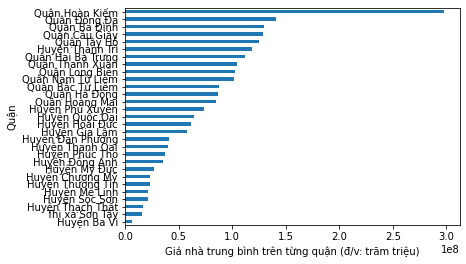

In [50]:
df.groupby('Quận')['Giá'].mean().sort_values().plot(kind='barh')
plt.xlabel('Giá nhà trung bình trên từng quận (đ/v: trăm triệu)') 

- Ta dễ dàng thấy được quận Hoàn Kiếm có giá nhà cao nhất trên địa bàn thành phố Hà Nội. Điều này là dễ hiểu vì Hoàn Kiếm là khu vực trung tâm, là huyết mạch phát triển kinh tế của Hà Nội, tập trung nhiều tiện tích về bệnh viện ,trường học lớn cũng như các cơ quan hành chính quan trọng, nơi sẽ diễn ra nhiều hoạt động văn hóa lỡn của thủ đô Hà Nội
- Ngoài ra, đa phần các tuyến phố ở nơi đây đều bắt đầu bằng chữ Hàng tức là 36 phố phường nổi tiếng từ thời Lý-Trần, nơi lưu giữ dấu tích văn hóa cũng như địa điểm du lịch không thể bỏ qua của du khách trong và ngoài nước khi đến Hà Nội. 

Text(0.5, 0, 'Số căn nhà được bán ở từng quận')

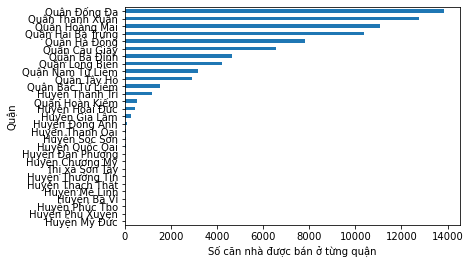

In [51]:
df.groupby('Quận')['Giá'].count().sort_values().plot(kind='barh')
plt.xlabel('Số căn nhà được bán ở từng quận')

- Đất Hoàn Kiếm là 1 miếng vàng quý giá, mỗi tấc đất tại đây ví như tấc vàng. Do đó số nhà được bán tại đây rất hiếm (thấp hơn hẳn so với các quận trung tâm khác)

In [52]:
df.groupby(['Huyện','Quận'])['Giá'].agg(['count','mean']).sort_values(by='mean').tail(10)

count          mean
Huyện             Quận                                
Phường Hàng Buồm  Quận Hoàn Kiếm      29  4.525141e+08
Phường Hàng Bồ    Quận Hoàn Kiếm      14  4.566987e+08
Phường Hàng Bông  Quận Hoàn Kiếm      23  4.878548e+08
Phường Hàng Bạc   Quận Hoàn Kiếm      13  5.076146e+08
Phường Tràng Tiền Quận Hoàn Kiếm      17  5.451560e+08
Phường Trung Tự   Quận Đống Đa       298  5.463743e+08
Phường Hàng Đào   Quận Hoàn Kiếm       6  5.599191e+08
Phường Lý Thái Tổ Quận Hoàn Kiếm      23  6.793415e+08
Phường Hàng Trống Quận Hoàn Kiếm       7  7.931491e+08
Xã Ngọc Hồi       Huyện Thanh Trì     86  8.370839e+08

- Để chứng minh cho các luận điểm ở trên thì trong 10 phường có giá nhà trung bình cao nhất thì hết 8 phường nằm tại quận Hoàn Kiếm

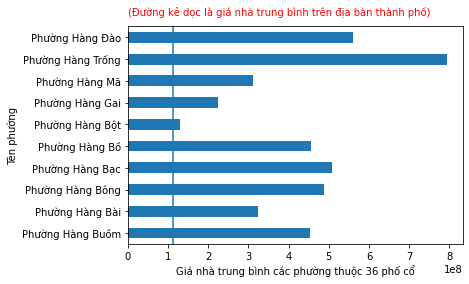

In [53]:
df[df['Huyện'].str.contains("Hàng",na=False)].groupby('Huyện')['Giá'].mean().plot(kind='barh')
plt.axvline(df['Giá'].mean())
plt.text(20,10,'(Đường kẻ dọc là giá nhà trung bình trên địa bàn thành phố)', color='red',rotation=0)
plt.xlabel('Giá nhà trung bình các phường thuộc 36 phố cổ')
plt.ylabel('Tên phường')
plt.show()

- Các phố trong 36 phố phường đều có mức nhà cao hơn mức trung bình của toàn thành phố (tầm 100tr/m2)
- Đặc biệt, Hàng Trống (gần 800tr/m2) và Hàng Đào (550 tr/m2) là 2 phố có giá nhà ngang ngửa nhau và nằm trong top đầu của Thủ đô

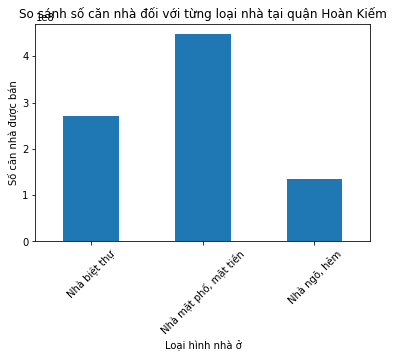

In [54]:
df[df['Quận'] == 'Quận Hoàn Kiếm'].groupby('Loại hình nhà ở')['Giá'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Số căn nhà được bán');
plt.title('So sánh số căn nhà đối với từng loại nhà tại quận Hoàn Kiếm');

In [55]:
hang = df[df['Huyện'].str.contains("Hàng",na=False)]

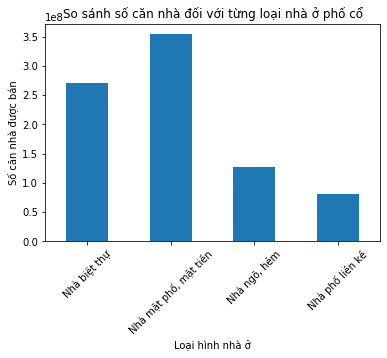

In [56]:
hang.groupby('Loại hình nhà ở')['Giá'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Số căn nhà được bán');
plt.title('So sánh số căn nhà đối với từng loại nhà ở phố cổ');

- Một điều đáng ngạc nhiên là tại các phường này thì nhà mặt phố, mặt tiền lại có giá trị trung bình lớn hơn cả nhà biệt thự. Có lẽ phần lớn là tại vì các ngôi nhà ở mặt tiền chính là những con gà đẻ trứng vàng giúp sinh lời nhanh chóng thông qua việc kinh doanh buôn bán cho khách du lịch

## Sự bùng nổ của thị trường đầu tư bđs các vùng ven trung tâm

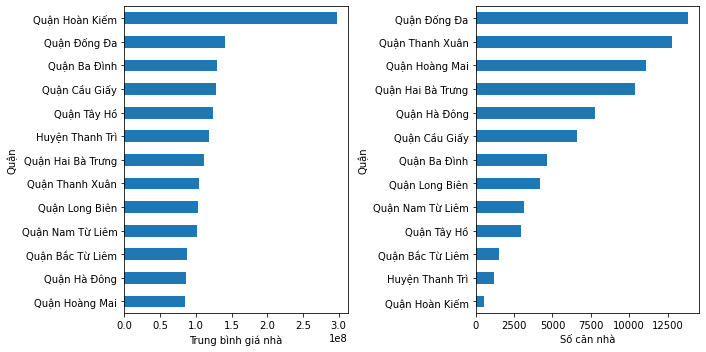

In [57]:
# colors = ['red' if word == target else 'blue' for word in data.word]
# bars = plt.bar(x=data.word, height=data.number, color=colors, alpha=0.5)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
df.groupby('Quận')['Giá'].mean().sort_values().tail(13).plot(kind='barh',ax=ax1)
ax1.set_xlabel('Trung bình giá nhà');
df.groupby('Quận')['Giá'].count().sort_values().tail(13).plot(kind='barh',ax=ax2)
ax2.set_xlabel('Số căn nhà');
plt.tight_layout()

- Từ bar chart ta có thể thấy đất các quận trung tâm như Ba Đình, Hai Bà Trưng hay Hoàn Kiếm ngày càng đắt đỏ nên các ngôi nhà bắt đầu được đầu tư, xây dựng ở các khu vực rộng hơn, có tiềm năng hơn như các quận ở vùng ven như Hà Đông (phía Tây), Long Biên (phía Đông) hay Hoàng Mai (phía Nam)
- Nhờ các dự án cầu đường và giao thông sẽ góp phần làm tăng giá trị nhà đất các vùng ven và giảm áp lực tại các quận trung tâm. Đồng thời, các đô thị vệ tính góp phần làm giảm áp lực nội đô Hà Nội, đặc biệt là áp lực di dân đô thị. Do đó không khó hiểu khi các ngôi nhà nằm tại các vùng ven đang phát triển như Hà Đông, Long Biên hay Hoàng Mai lại dần chiếm tỷ trọng lớn trong nguồn cung

In [58]:
import datetime as dt
df2019 = df[df.Ngày <= '2020-06-01']
df2020 = df[df.Ngày > '2020-06-01']

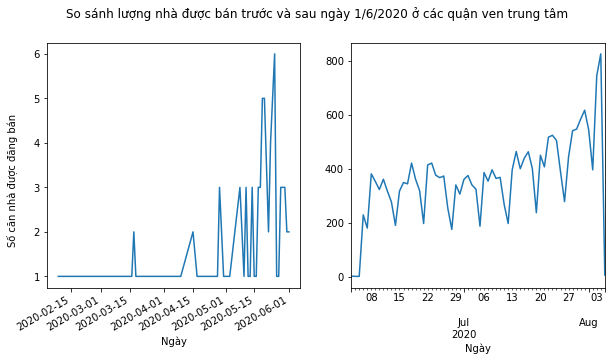

In [59]:
new = ['Quận Long Biên','Quận Hoàng Mai', 'Quận Hà Đông']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
df2019[df2019['Quận'].isin(new)].groupby('Ngày')['Giá'].count().plot(ax=ax1)
df2020[df2020['Quận'].isin(new)].groupby('Ngày')['Giá'].count().plot(ax=ax2)
fig.text(0.07, 0.5, 'Số căn nhà được đăng bán', va='center', rotation='vertical')
plt.suptitle('So sánh lượng nhà được bán trước và sau ngày 1/6/2020 ở các quận ven trung tâm')
plt.show()

- Trước tháng 6/2020, lượng nhà bán tại các quận này nay vô cùng thưa thớt. Tuy nhiên kể từ thời điểm 1/6, các căn nhà được bán với số lượng cực kỳ nhiều, có hôm lên tới hơn 400 căn nhà

## Hà Đông

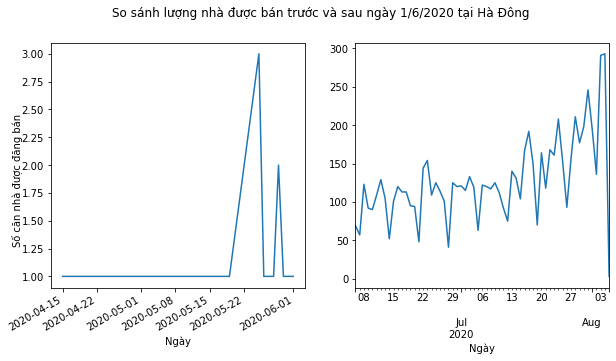

In [60]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
df2019[df2019['Quận'] == 'Quận Hà Đông'].groupby('Ngày')['Giá'].count().plot(ax=ax1)
df2020[df2020['Quận'] == 'Quận Hà Đông'].groupby('Ngày')['Giá'].count().plot(ax=ax2)
fig.text(0.07, 0.5, 'Số căn nhà được đăng bán', va='center', rotation='vertical')
plt.suptitle('So sánh lượng nhà được bán trước và sau ngày 1/6/2020 tại Hà Đông')
plt.show()

- Như đã đề cập ở trên, kể từ tháng 6 năm 2002, lượng nhà được đăng bán ở Hà Đông tăng rất nhanh

- Điều này là dễ hiểu vì hạ tầng giao thông và hạ tầng xã hội của Hà Đông ngày càng hoàn thiện. Nhiều làn đường của quận được mở rộng như Quang Trung, Tố Hữu, Lê Trọng Tấn, Aeon Mall Hà Đông, mở tuyến đường sắt trên cao metro Cát Linh - Hà Đông, tuyến xe buýt nhanh BRT giúp việc di chuyển của cư dân trong quận đến trung tâm thành phố ngày càng thuận tiện.
- Từ Hà Đông dễ dàng kết nối các tỉnh thành lân cận như Hòa Bình, Sơn La nhờ vị trí cửa ngõ phía Tây Nam của Hà Nội, đầu mối các tuyến đường giao thông quan trọng như QL6, QL21B

In [61]:
df2 = df[df['Loại hình nhà ở'] == 'Nhà mặt phố, mặt tiền']
df3 = df[df['Loại hình nhà ở'] == 'Nhà biệt thự']

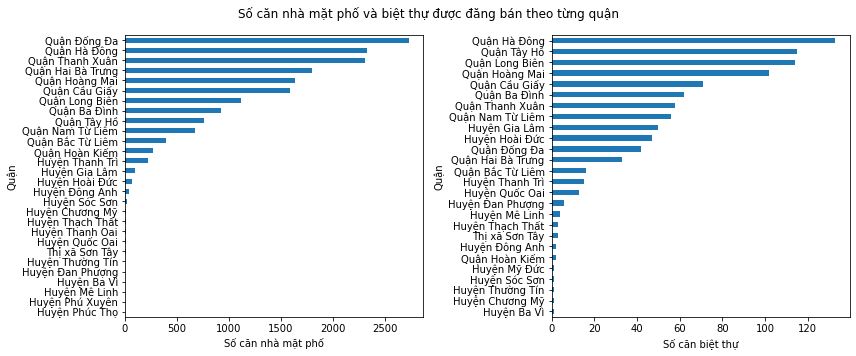

In [62]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
df2.groupby('Quận').Giá.count().sort_values().plot(kind='barh',ax=ax1)
ax1.set_xlabel('Số căn nhà mặt phố')
df3.groupby('Quận').Giá.count().sort_values().plot(kind='barh',ax=ax2)
ax2.set_xlabel('Số căn biệt thự')
plt.suptitle('Số căn nhà mặt phố và biệt thự được đăng bán theo từng quận')
plt.tight_layout()

-  Số nhà mặt phố và nhà biệt thự được đăng bán ở quận Hà Đông đều dẫn đầu trong danh sách các quận Hà Nội. Lượng cung về số nhà biệt thự và nhà mặt phố tăng cũng có nghĩa là lượng cầu của các cư dân thuộc tầng lớp khá giả cũng rất lớn. Người dân dần chuyển dịch về các khu ngoại thành để sinh sống, lập nghiệp

Text(20, 15, '(Đường kẻ dọc là giá nhà trung bình trên địa bàn thành phố)')

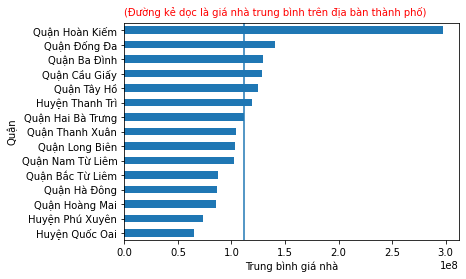

In [63]:
df.groupby('Quận')['Giá'].mean().sort_values().tail(15).plot(kind='barh')
plt.axvline(df['Giá'].mean())
plt.xlabel('Trung bình giá nhà')
plt.text(20,15,'(Đường kẻ dọc là giá nhà trung bình trên địa bàn thành phố)', color='red',rotation=0)

- Giá nhà vẫn còn thấp hơn nhiều so với mức trung bình của cả tỉnh lại đi kèm với các lợi ích khó chối bỏ nên người dân đổ xô mua nhà ở đây là điều hợp lý

## Các huyện sắp lên thành phố: các dự án tại năm huyện sắp lên quận gồm Hoài Đức, Đông Anh, Thanh Trì, Gia Lâm và Đan Phượng 

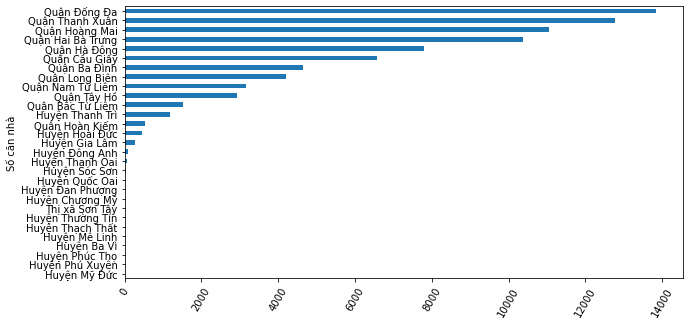

In [64]:
df.groupby('Quận').Giá.count().sort_values().plot(kind='barh',figsize=(10,5))
plt.xticks(rotation=60)
plt.ylabel('Số căn nhà');

- Ta có thể thấy các ngôi nhà được bán phần lớn đều nằm ở các quận. Ở các huyện thì chủ yêu các ngôi nhà được bán ở Thanh Trì, Hoài Đức, Đông Anh và Gia Lâm. Đây là 4 huyện nằm trong dự án đưa 5 huyện (có cả huyện Đan Phượng) lên quận trong giai đoạn 2020-2025. Điều này cộng với việc giá bất động sản khu vực nội thành càng ngày càng cao nên người dân có xu hướng dịch chuyển đến vùng ngoại thành từ đó dẫn đến việc hình thành các khu dân cư mới

In [65]:
import datetime as dt
df2019 = df[df.Ngày <= '2020-06-01']
df2020 = df[df.Ngày > '2020-06-01']

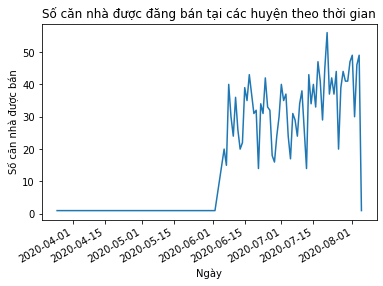

In [66]:
district = ['Huyện Thanh Trì', 'Huyện Hoài Đức',
            'Huyện Đông Anh', 'Huyện Gia Lâm']
a = df[df['Quận'].isin(district)].groupby('Ngày')['Giá'].count()
a.plot()
plt.ylabel('Số căn nhà được bán')
plt.title('Số căn nhà được đăng bán tại các huyện theo thời gian');

- Ta có thể thấy trước tháng 6 năm 2020, số ngôi nhà được bán ở các vùng này là rất ít (gần như không có). Tuy nhiên kể từ ngày 1/6, khi mà thông tin các huyện này được đưa lên quận được phổ biến rộng rãi thì bắt đầu rộ lên cơn sốt mua cũng như bán nhà 

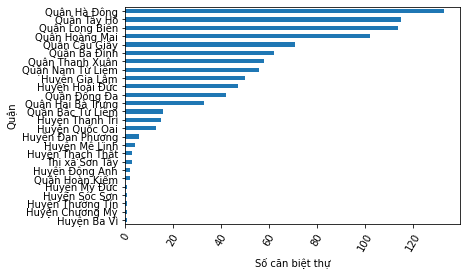

In [67]:
df3.groupby('Quận').Giá.count().sort_values().plot(kind='barh')
plt.xticks(rotation=60);
plt.xlabel('Số căn biệt thự');

- Đặc biệt tại các huyện như Gia Lâm, Hoài Đức, các căn biệt thự mọc lên và được đưa vào thị trường buôn bán nhà ngày càng nhiều, nhiều hơn cả các quận ở khu trung tâm như Đống Đa, Hai Bà Trưng hay Hoàn Kiếm

## Những Quận nào có giá đất trung bình thuộc top cao nhất?

In [68]:
df

Ngày                                            Địa chỉ  \
0     2020-08-05  Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...   
1     2020-08-05  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   
2     2020-08-05  phố minh khai, Phường Minh Khai, Quận Hai Bà T...   
3     2020-08-05  Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...   
4     2020-08-05  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   
...          ...                                                ...   
82490 2019-08-26  Đường Lê Đức Thọ, Phường Mỹ Đình 1, Quận Nam T...   
82491 2019-08-23  Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...   
82492 2019-08-07  Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...   
82493 2019-08-07  Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...   
82494 2019-08-05  Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...   

                    Quận             Huyện        Loại hình nhà ở  \
0          Quận Cầu Giấy   Phường Nghĩa Đô           Nhà ngõ, hẻm   
1        Quận Thanh Xuân  Phường Kim Giang  Nhà mặt phố, mặt tiền   
2      Quận Hai Bà Trưng  Phường Minh Khai           Nhà ngõ, hẻm   
3            Quận Tây Hồ  Phường Thụy Khuê           Nhà ngõ, hẻm   
4        Quận Thanh Xuân  Phường Kim Giang           Nhà ngõ, hẻm   
...                  ...               ...                    ...   
82490   Quận Nam Từ Liêm  Phường Mỹ Đình 1        Nhà phố liền kề   
82491   Quận Bắc Từ Liêm  Phường Phúc Diễn        Nhà phố liền kề   
82492      Quận Cầu Giấy   Phường Quan Hoa  Nhà mặt phố, mặt tiền   
82493      Quận Cầu Giấy   Phường Quan Hoa  Nhà mặt phố, mặt tiền   
82494      Quận Cầu Giấy   Phường Quan Hoa           Nhà ngõ, hẻm   

      Giấy tờ pháp lý  Số tầng  Số phòng ngủ  Diện tích    Dài  Rộng  \
0            Đã có sổ      4.0           5.0       46.0   0.00   0.0   
1            Không rõ      0.0           3.0       37.0   0.00   0.0   
2            Đã có sổ      4.0           4.0       40.0  10.00   4.0   
3            Đã có sổ      0.0           6.0       51.0  12.75   4.0   
4            Không rõ      0.0           4.0       36.0   9.00   4.0   
...               ...      ...           ...        ...    ...   ...   
82490        Đã có sổ      0.0           3.0       38.0   0.00   0.0   
82491        Không rõ      0.0           3.0       38.0   0.00   0.0   
82492        Không rõ      0.0           3.0       50.0   0.00   0.0   
82493        Đã có sổ      0.0           4.0       41.0   0.00   0.0   
82494        Đã có sổ      0.0           4.0       60.0   0.00   0.0   

                Giá/m2          Giá  
0       86,96 triệu/m²   86960000.0  
1      116,22 triệu/m²  116220000.0  
2          65 triệu/m²   65000000.0  
3         100 triệu/m²  100000000.0  
4       86,11 triệu/m²   86110000.0  
...                ...          ...  
82490   76,32 triệu/m²   76320000.0  
82491   81,58 triệu/m²   81580000.0  
82492     292 triệu/m²  292000000.0  
82493  341,46 triệu/m²  341460000.0  
82494  101,67 triệu/m²  101670000.0  

[81680 rows x 13 columns]

In [69]:
df1 = df.groupby(['Quận'])['Giá'].mean()

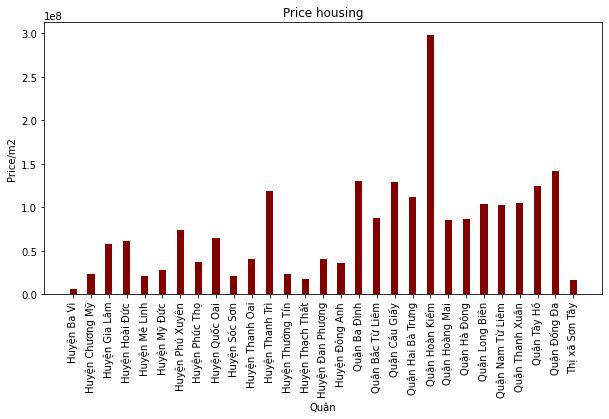

In [70]:
fig = plt.figure(figsize = (10, 5))
 
# Creating the bar plot
plt.bar(df1.keys(), df1.values, color ='maroon', width = 0.4)
plt.xlabel("Quận")
plt.xticks(rotation = 90)
plt.ylabel("Price/m2")
plt.title("Price housing")
plt.show()

- Nhận xét:
  - Dựa vào `bar chart` ở trên, các quận/huyện có trung bình giá/m2 cao có thể nói đến như: Quận Hoàn Kiếm, Quận Cầu Giấy, Quận Ba Đình, Quận Tây Hồ, Quận Đống Đa, Quận Bắc/Nam Từ Liêm,...

##  Ngày qua ngày thì loại hình nhà ở nào trở nên phổ biến?

In [71]:
housing_types_by_day = df.groupby(['Ngày', 'Loại hình nhà ở'])['Loại hình nhà ở'].count()

In [72]:
list_tuples = [housing_types_by_day.keys()[i] + (housing_types_by_day.values[i], ) for i in range(len(housing_types_by_day))]

In [73]:
df_temp = pd.DataFrame(list_tuples, columns =['Date', 'TypeOfHousing', 'Count'])
df_temp

Date          TypeOfHousing  Count
0   2019-08-05           Nhà ngõ, hẻm      1
1   2019-08-07  Nhà mặt phố, mặt tiền      2
2   2019-08-23        Nhà phố liền kề      1
3   2019-08-26        Nhà phố liền kề      1
4   2019-09-19           Nhà ngõ, hẻm      1
..         ...                    ...    ...
426 2020-08-04  Nhà mặt phố, mặt tiền    372
427 2020-08-04           Nhà ngõ, hẻm   2168
428 2020-08-04        Nhà phố liền kề     40
429 2020-08-05  Nhà mặt phố, mặt tiền      3
430 2020-08-05           Nhà ngõ, hẻm     19

[431 rows x 3 columns]

In [74]:
table=pd.pivot_table(df_temp,
                     index=['Date'],
                     columns=['TypeOfHousing']
                     ,fill_value=0)
table

Count                                                   
TypeOfHousing Nhà biệt thự Nhà mặt phố, mặt tiền Nhà ngõ, hẻm Nhà phố liền kề
Date                                                                         
2019-08-05               0                     0            1               0
2019-08-07               0                     2            0               0
2019-08-23               0                     0            0               1
2019-08-26               0                     0            0               1
2019-09-19               0                     0            1               0
...                    ...                   ...          ...             ...
2020-08-01              17                   300         1307              25
2020-08-02              12                   243          831              29
2020-08-03              19                   344         1690              38
2020-08-04              20                   372         2168              40
2020-08-05               0                     3           19               0

[174 rows x 4 columns]

In [75]:
table.columns = table.columns.get_level_values(1).rename(None)
table = table.reset_index()

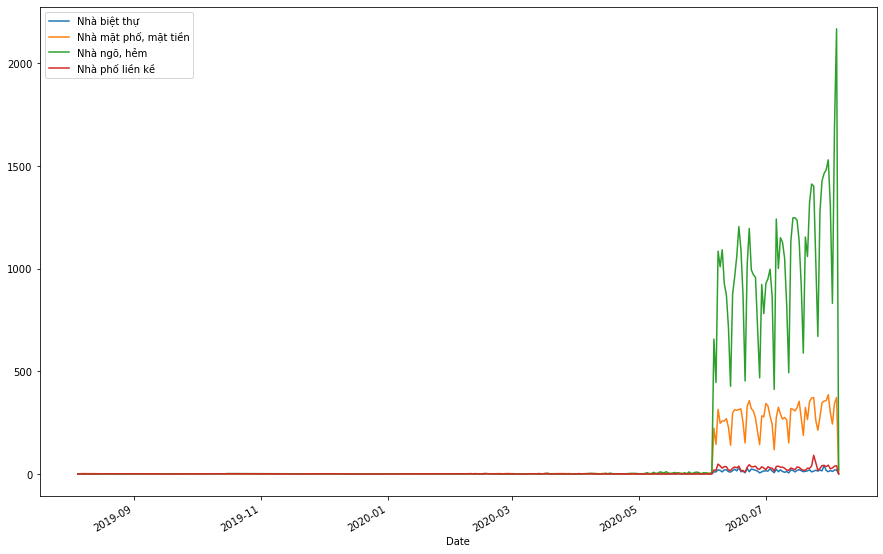

In [76]:
table.set_index('Date').plot(figsize=(15,10));

- Nhận xét: Dựa vào `multiple line graph` ở trên ta có thể nhận ra:
  - Từ `15/10/2019` -> `7/5/2020`, các loại hình nhà ở không có dấu hiệu tăng trong khoảng thời gian này.
  - Trong khoảng thời gian từ `7/5/2020` về sau:
    - 2 loại hình nhà ở: `Nhà biệt thự ` và `Nhà phố liền kề` có dấu hiệu tăng nhưng không quá đáng kể.
    - 2 loại hình nhà ở còn lại là `Nhà mặt phố, mặt tiền ` và `Nhà ngõ, hẻm` tăng nhanh chóng. Trong đó, loại hình nhà ở `Nhà ngỏ, hẽm`  là tăng đột biến và không có dấu hiệu chững lại

## Top 10 quận nào có số lượng nhà được mua nhiều nhất

In [77]:
QH_df = df.groupby('Quận')['Quận'].count()

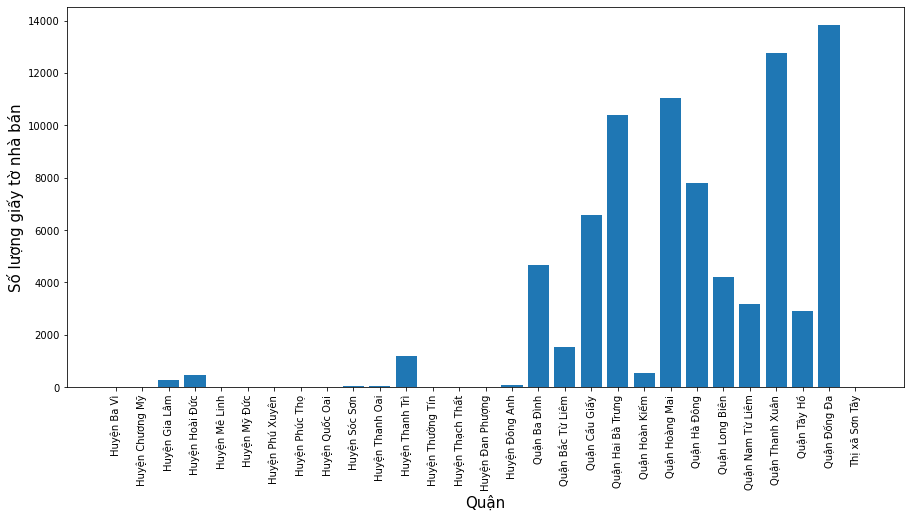

In [78]:
# Increase the size of the figure (chart)
plt.figure(figsize=[15, 7])

# Creating a bar chart with the parameters
plt.bar(QH_df.keys(), QH_df.values)

plt.xlabel('Quận', fontsize=15, )
plt.ylabel('Số lượng giấy tờ nhà bán', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

In [79]:
lst = QH_df.keys()
lst2 = QH_df.values
  
# Calling DataFrame constructor after zipping both lists, with columns specified
num_df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['Quận', 'Số giấy tờ nhà bán'])
num_df

Quận  Số giấy tờ nhà bán
0         Huyện Ba Vì                   6
1     Huyện Chương Mỹ                  20
2       Huyện Gia Lâm                 271
3      Huyện Hoài Đức                 451
4       Huyện Mê Linh                  11
5        Huyện Mỹ Đức                   1
6     Huyện Phú Xuyên                   1
7      Huyện Phúc Thọ                   2
8      Huyện Quốc Oai                  24
9       Huyện Sóc Sơn                  40
10    Huyện Thanh Oai                  51
11    Huyện Thanh Trì                1193
12   Huyện Thường Tín                  16
13   Huyện Thạch Thất                  14
14   Huyện Đan Phượng                  22
15     Huyện Đông Anh                  97
16       Quận Ba Đình                4658
17   Quận Bắc Từ Liêm                1528
18      Quận Cầu Giấy                6568
19  Quận Hai Bà Trưng               10381
20     Quận Hoàn Kiếm                 527
21     Quận Hoàng Mai               11063
22       Quận Hà Đông                7798
23     Quận Long Biên                4212
24   Quận Nam Từ Liêm                3168
25    Quận Thanh Xuân               12769
26        Quận Tây Hồ                2929
27       Quận Đống Đa               13839
28     Thị xã Sơn Tây                  19

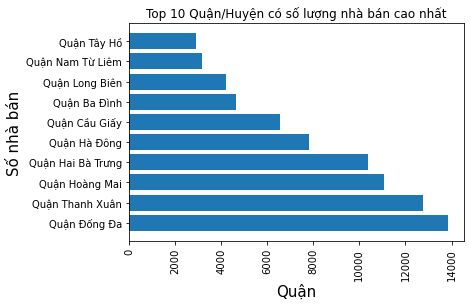

In [80]:
top10 = num_df.sort_values('Số giấy tờ nhà bán', ascending=0).head(10)
plt.barh(top10['Quận'], top10['Số giấy tờ nhà bán'])

plt.title('Top 10 Quận/Huyện có số lượng nhà bán cao nhất')
plt.xlabel('Quận', fontsize=15)
plt.ylabel('Số nhà bán', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

## Quận nào có giấy tờ pháp lí (đã có sổ) nhiều nhất

In [81]:
GT_df = df[df['Giấy tờ pháp lý']=='Đã có sổ']
GT_df = GT_df.groupby('Quận')['Quận'].count()
GT_df

Quận
Huyện Ba Vì             3
Huyện Chương Mỹ        15
Huyện Gia Lâm         159
Huyện Hoài Đức        357
Huyện Mê Linh          10
Huyện Mỹ Đức            1
Huyện Phú Xuyên         1
Huyện Phúc Thọ          1
Huyện Quốc Oai         13
Huyện Sóc Sơn          29
Huyện Thanh Oai        42
Huyện Thanh Trì       895
Huyện Thường Tín       13
Huyện Thạch Thất       11
Huyện Đan Phượng       16
Huyện Đông Anh         71
Quận Ba Đình         3263
Quận Bắc Từ Liêm     1063
Quận Cầu Giấy        4433
Quận Hai Bà Trưng    6064
Quận Hoàn Kiếm        372
Quận Hoàng Mai       6730
Quận Hà Đông         5497
Quận Long Biên       2855
Quận Nam Từ Liêm     2197
Quận Thanh Xuân      7880
Quận Tây Hồ          2091
Quận Đống Đa         8467
Thị xã Sơn Tây         15
Name: Quận, dtype: int64

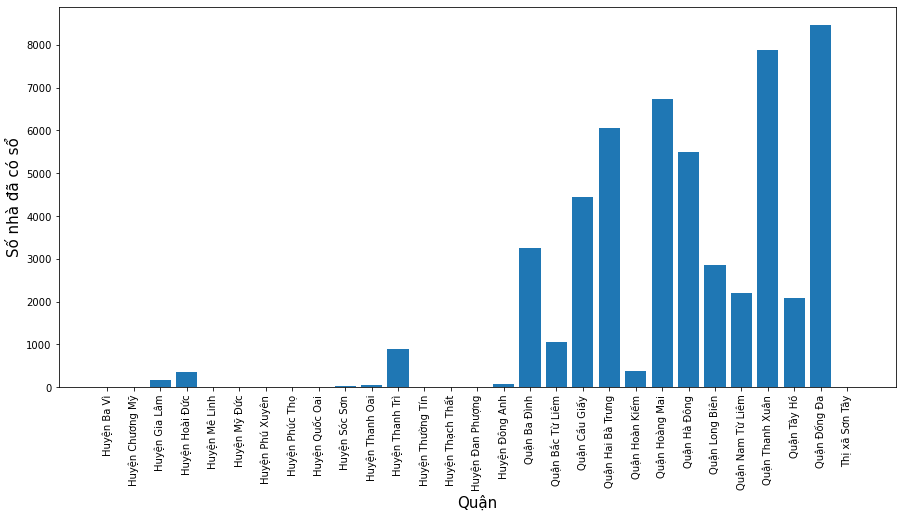

In [82]:
# Increase the size of the figure (chart)
plt.figure(figsize=[15, 7])

# Creating a bar chart with the parameters
plt.bar(GT_df.keys(), GT_df.values)

plt.xlabel('Quận', fontsize=15, )
plt.ylabel('Số nhà đã có sổ', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

- Nhận xét:
  - Dựa vào biểu đồ `bar chart` ở trên, ta có thể thấy những quận/huyện có số ngôi nhà được bán cao như: Quận Ba Đình, Quận Cầu Giấy, Quận Hai Bà Trưng, Quận Hoàng Mai, Quận Hà Đông, Quận Thanh Xuân, Quận Đống Đa, ....

##  Loại hình nhà ở nào có giấy tờ pháp lí nhiều nhất/ ít nhất?

In [83]:
NO_df = df[df['Giấy tờ pháp lý']=='Đã có sổ']
NO_df = NO_df.groupby('Loại hình nhà ở')['Loại hình nhà ở'].count()
NO_df

Loại hình nhà ở
Nhà biệt thự               604
Nhà mặt phố, mặt tiền    11440
Nhà ngõ, hẻm             39291
Nhà phố liền kề           1220
Name: Loại hình nhà ở, dtype: int64

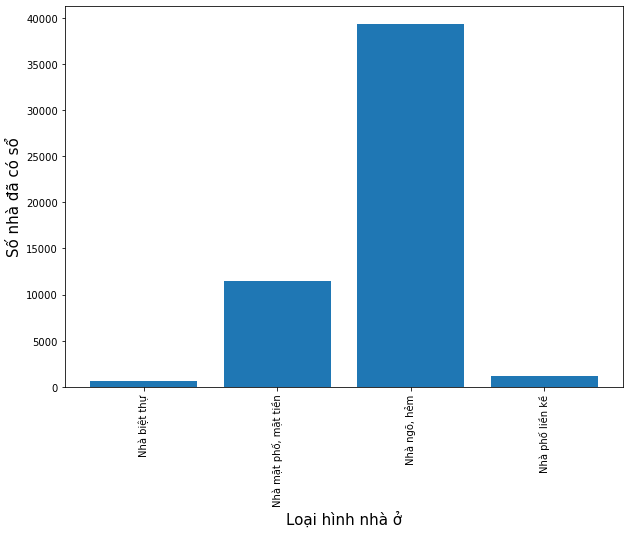

In [84]:
# Increase the size of the figure (chart)
plt.figure(figsize=[10, 7])

# Creating a bar chart with the parameters
plt.bar(NO_df.keys(), NO_df.values)

plt.xlabel('Loại hình nhà ở', fontsize=15)
plt.ylabel('Số nhà đã có sổ', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

- Nhận xét:
  - Dựa vào biểu đồ `bar chart` phía trên, ta có thể thấy rõ loại hình nhà ở `Nhà ngõ, hẽm` chiếm đa số. 

## Loại hình nhà ở nào thường được xây nhiều tầng?

In [85]:
T_df = df.groupby(['Loại hình nhà ở'])['Số tầng'].mean()
T_df

Loại hình nhà ở
Nhà biệt thự             2.009454
Nhà mặt phố, mặt tiền    2.100358
Nhà ngõ, hẻm             1.940446
Nhà phố liền kề          2.166400
Name: Số tầng, dtype: float64

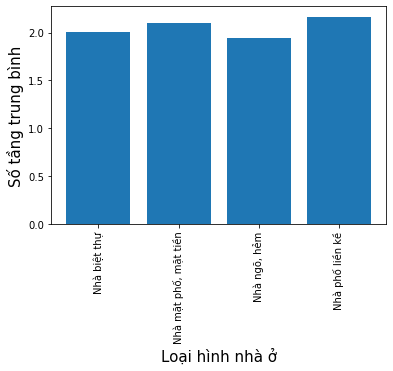

In [86]:
plt.bar(T_df.keys(), T_df.values)
plt.xlabel('Loại hình nhà ở', fontsize=15)
plt.ylabel('Số tầng trung bình', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

- Nhận xét:
  - Các loại hình nhà ở không quyết định được số tầng là ít hay nhiều

##  Có phải số phòng ngủ nhiều thì diện tích lớn không?

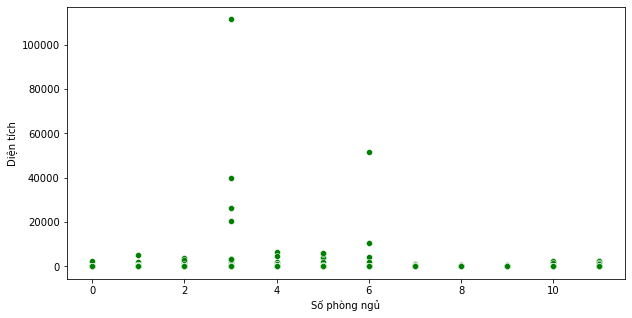

In [87]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Số phòng ngủ", y="Diện tích", color = 'g');

- Nhận xét: 
  - Số lượng phòng ngủ dường như không liên quan đến diện tích căn nhà.

## Nhà có diện tích rộng thì giá/m2 cao?

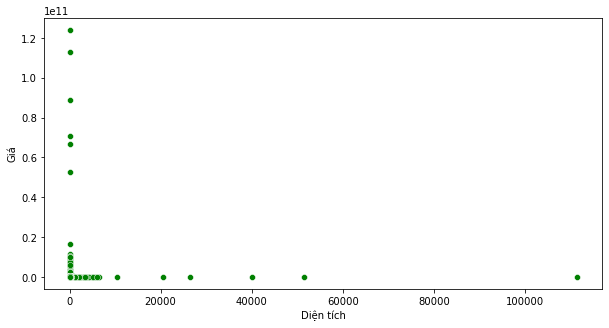

In [88]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Diện tích", y="Giá", color = 'g');

## Liệu có mối quan hệ giữa Diện tích, Giá/m2 với Giấy tờ pháp lí (kiểu khi nơi đất giá cao thì họ sẽ ưu tiên làm giấy tờ pháp lí hơn)

In [89]:
df['Đã có giấy tờ'] = np.where(df['Giấy tờ pháp lý'] == 'Đã có sổ', 1, 0)

In [90]:
df.sample(10)

Ngày                                            Địa chỉ  \
40646 2020-07-09  Đường Kim Mã, Phường Kim Mã, Quận Ba Đình, Hà Nội   
30482 2020-07-17  Đường 19/5, Phường Văn Quán, Quận Hà Đông, Hà Nội   
16681 2020-07-27  5, Nguyễn Khánh Toàn, Phường Quan Hoa, Quận Cầ...   
36368 2020-07-13  Đường Quan Nhân, Phường Nhân Chính, Quận Thanh...   
14632 2020-07-28  Đường Khương Trung, Phường Khương Trung, Thanh...   
35655 2020-07-14  Đường Cổ Nhuế, Phường Cổ Nhuế 2, Quận Bắc Từ L...   
44612 2020-07-07  Đường Nguyễn Khang, Phường Yên Hoà, Quận Cầu G...   
7483  2020-08-01  Đường Vĩnh Phúc, Phường Vĩnh Phúc, Quận Ba Đìn...   
3138  2020-08-03  Đường Đặng Văn Ngữ, Phường Trung Tự, Quận Đống...   
24518 2020-07-22  Đường Khương Hạ, Phường Khương Đình, Quận Than...   

                   Quận                Huyện        Loại hình nhà ở  \
40646      Quận Ba Đình        Phường Kim Mã           Nhà ngõ, hẻm   
30482      Quận Hà Đông      Phường Văn Quán           Nhà ngõ, hẻm   
16681     Quận Cầu Giấy      Phường Quan Hoa  Nhà mặt phố, mặt tiền   
36368   Quận Thanh Xuân    Phường Nhân Chính           Nhà ngõ, hẻm   
14632   Quận Thanh Xuân  Phường Khương Trung           Nhà ngõ, hẻm   
35655  Quận Bắc Từ Liêm     Phường Cổ Nhuế 2           Nhà ngõ, hẻm   
44612     Quận Cầu Giấy       Phường Yên Hoà  Nhà mặt phố, mặt tiền   
7483       Quận Ba Đình     Phường Vĩnh Phúc        Nhà phố liền kề   
3138       Quận Đống Đa      Phường Trung Tự           Nhà ngõ, hẻm   
24518   Quận Thanh Xuân   Phường Khương Đình           Nhà ngõ, hẻm   

      Giấy tờ pháp lý  Số tầng  Số phòng ngủ  Diện tích   Dài  Rộng  \
40646        Không rõ      0.0           3.0       27.0   0.0   0.0   
30482        Đã có sổ      0.0           5.0       60.0   0.0   3.5   
16681        Đã có sổ      5.0           3.0       30.0   0.0   0.0   
36368        Đã có sổ      4.0           2.0       23.0   0.0   3.0   
14632        Không rõ      0.0           4.0       40.0   0.0   0.0   
35655        Đã có sổ      0.0           4.0       95.0  14.0   7.0   
44612        Đã có sổ      0.0           5.0       40.0   0.0   0.0   
7483         Đã có sổ      4.0           4.0       80.0  17.8   4.5   
3138         Đã có sổ      5.0           4.0       42.0   0.0   5.0   
24518        Đã có sổ      0.0           3.0       32.0   0.0   0.0   

                Giá/m2          Giá  Đã có giấy tờ  
40646    93,7 triệu/m²   93700000.0              0  
30482      80 triệu/m²   80000000.0              1  
16681  116,67 triệu/m²  116670000.0              1  
36368   86,96 triệu/m²   86960000.0              1  
14632      80 triệu/m²   80000000.0              0  
35655   44,21 triệu/m²   44210000.0              1  
44612      95 triệu/m²   95000000.0              1  
7483    117,5 triệu/m²  117500000.0              1  
3138     88,1 triệu/m²   88100000.0              1  
24518   92,19 triệu/m²   92190000.0              1

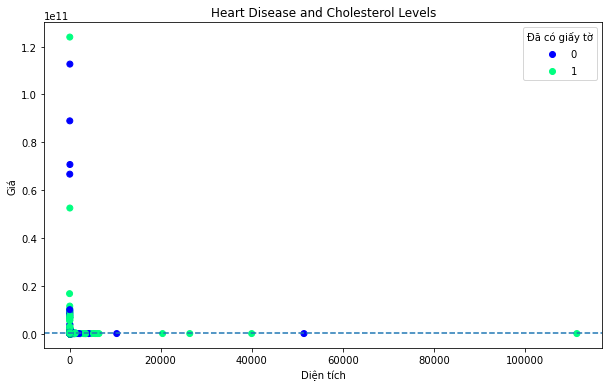

In [91]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=df["Diện tích"],
                      y=df["Giá"],
                      c=df["Đã có giấy tờ"],
                      cmap="winter")

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Diện tích",
       ylabel="Giá");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Đã có giấy tờ");

'''
NOTE:
*scatter.legend_elements(): * grab the values of scatter and use
* to unpack the legend element, legend_elements() to query "c" 
parameter and look back at heart_disease dataframe and what values
are in this in target column -> 0 & 1 
=> .legend() to create the legend built off element (0/1)
'''

# Add a horizontal line
ax.axhline(df["Giá"].mean(),
          linestyle="--");

- Nhận xét: 
  - Dựa vào biểu đồ ở trên, ta thấy hầu hết các nhà đều có giấy tờ. Và cũng không có dấu hiệu là `Diện tích ` và `Giá ` có ảnh hưởng quá nhiều đến việc làm giấy tờ
  => Có vẻ như việc ưu tiên làm giấy tờ dựa vào giá hay diện tích ngôi nhà là không hề liên quan.

In [92]:
df['Đã có giấy tờ'].value_counts()

1    52565
0    29115
Name: Đã có giấy tờ, dtype: int64